# FINAL REPORT
### Hotel Market Dynamics:
### A Comparative Analysis of Amsterdam and Brussels (January-April 2021)


---




**Name student:** Govinda Lienart  
**Date:** 9/12/2024

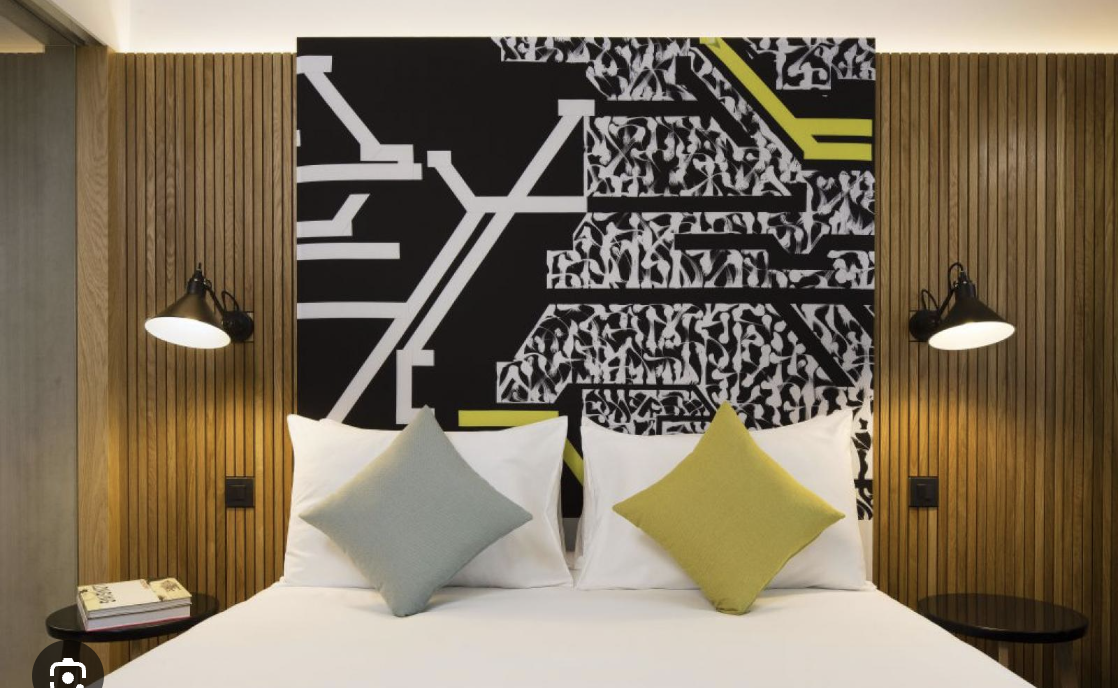



---



# TABLE OF CONTENTS

#### 1. EXECUTIVE SUMMARY
#### 2. OBJECTIVE
#### 3. DATASET DESCRIPTION
    3.1 Booking Dataset  
    3.2 Hotel Information Dataset
#### 4. PRE-PROCESSING AND EXPLORATORY ANALYSIS
    4.1 Import of Libraries and Modules  
    4.2 Import of Data  
    4.3 Booking Dataset  
    4.3.1 Displaying the Dataset, Checking Datatypes, and Number of Rows  
    4.3.2 Detection of Duplicated Data  
    4.3.3 Identifying Missing Data  
    4.3.4 Rows with a High Number of Missing Values  
    4.3.5 Pre-Analysis of 'is_sold_out'  
    4.3.6 Pre-Analysis of 'room_name'  
    4.3.7 Pre-Analysis of 'meal_type_included'  
    4.3.8 Pre-Analysis of 'arrival_date'  
    4.3.9 Pre-Analysis of 'max_persons'  
    4.3.10 Pre-Analysis of 'our_hotel_id'  
    4.3.11 Pre-Analysis of 'lead_time'  
    4.3.12 Pre-Analysis of ‘price_value_ref’ and ‘price_value_non_ref’  
    4.4 Hotels Information Dataset  
    4.4.1 Displaying the Dataset: Checking Datatypes and Missing Values  
    4.4.2 Missing Values  
    4.4.3 Pre-Analysis of 'our_hotel_id' and 'name'  
    4.4.4 Pre-Analysis of 'room_count'  
    4.4.5 Pre-Analysis of 'stars'  
    4.4.6 Pre-Analysis of 'review_score'  
    4.4.7 Pre-Analysis of ‘latitude’ and ‘longitude’  
    4.5 Merging of Datasets and Correlations of Key Variables  
    4.5.1 Merging the Dataset 'hotels_information' and 'booking_data' into One Dataset 'merged_data'
    4.5.2 Merged Dataset: Correlations  
#### 5. COMPARATIVE DATA-ANALYSIS  
    5.1 Correlations Clustering in Hotel Data: price and review_score and stars  
    5.2 City-Wise Analysis of Hotel Stars and Review Scores  
    5.3 Hotel Sold-Out Status and Arrival Date Trends  
    5.4 Hotel Sold-Out Rates by Star Ratings and Review Scores Across Cities  
    5.5 Monthly Trends in Hotel Sold-Out Rates by Star Ratings and Review Scores Across Cities  
    5.6 Meal Inclusion and Hotel Room Prices  
    5.7 Meal Inclusion Across Star Ratings and Review Categories  
    5.8 Hotel Price Categories and Meal Inclusion  
    5.9 Lead Time Variations Across Hotel Star Ratings and Cities  
    5.10 Average Hotel Prices and Star Ratings  
    5.11 Average Hotel Prices Across Cities and Time  
    5.12 Room Category Distribution Across Hotel Star Ratings and Cities  
    5.13 Average Room Prices by Room Category  
    5.14 Room Categories Across Hotel Star Ratings  
    5.15 Meal Inclusion Types and Room Category
#### 6. CONCLUSION  



---



# 1. EXECUTIVE SUMMARY

The analysis of a hotel dataset, encompassing 25,380 booking records and 282 hotel entries from January to April 2021, explored the hotel markets of Amsterdam and Brussels. Conducted using Python, this analysis leveraged data processing and visualization tools to uncover meaningful insightsWhile Amsterdam boasts a significantly larger hotel market, both cities exhibit similar star rating distributions, with limited budget-friendly options. Sold-out rates spiked in January but declined over time, reflecting seasonal demand fluctuations. Amsterdam’s higher-star-rated hotels reported lower sold-out rates, whereas Brussels demonstrated unexpected demand for lower-rated hotels, possibly due to location advantages or flexible booking policies. The study also revealed that hotels offering meals, particularly breakfast, commanded higher average prices. However, refundable pricing did not influence meal inclusion. Room prices rose steadily throughout the period, with Amsterdam experiencing a sharper price increase compared to Brussels. Lower-rated hotels typically offered fewer room options, while higher-rated hotels provided greater variety. Suites and luxury rooms were priced significantly higher, but meal inclusion patterns did not show a consistent correlation with room types.These findings highlight notable trends, but further research is required to explore the complexities of the hotel industry, including the effects of geography, seasonality, and customer preferences. This would enable more comprehensive insights and support tailored pricing strategies. It is important to note that these findings represent a snapshot of the market during a specific period and may not reflect long-term trends.
















***

# 2. OBJECTIVE

The objective of this study is to analyze key trends in the hotel markets of Amsterdam and Brussels, focusing on pricing dynamics, occupancy rates, room categories, and customer preferences, to provide insights for developing tailored pricing strategies and optimizing hotel operations.















***

# 3. DATASET DESCRIPTION

### 3.1 Booking Dataset

| **Field**           | **Type** | **Meaning**                                                         |
|:--------------------:|:--------:|:-------------------------------------------------------------------:|
| `our_hotel_id`       | integer  | Unique identifier of the hotel.                                     |
| `arrival_date`       | date     | The date of stay.                                                   |
| `lead_time`          | integer  | The time (in days) between the sample generation date and the stay date. |
| `room_name`          | string   | Name of the selected room.                                          |
| `meal_type_included` | string   | Type of the meal included in the offer.                             |
| `max_persons`        | integer  | Number of persons allowed in the room.                              |
| `price_value_ref`    | float    | Price value for the reference offer.                                |
| `price_value_non_ref`| float    | Price value for a non-reference offer.                              |
| `is_sold_out`        | boolean  | Indicates whether the room is sold out.                             |



### 3.2 Hotel Information Dataset

| **Field**      | **Type** | **Meaning**                           |
|:--------------:|:--------:|:-------------------------------------:|
| `our_hotel_id` | integer  | Unique identifier of the hotel.       |
| `name`         | string   | Name of the hotel.                    |
| `review_score` | float    | Review score of the hotel.            |
| `stars`        | integer  | Star rating of the hotel.             |
| `latitude`     | float    | Latitude of the hotel's location.     |
| `longitude`    | float    | Longitude of the hotel's location.    |
| `room_count`   | integer  | Number of rooms in the hotel.         |


***

# 4. PRE-PROCESSING AND EXPLORATORY ANALYSIS

## 4.1 Import of libraries and modules

> ℹ This script first installs and then imports a variety of data-focused Python libraries and their key components (pandas, seaborn, matplotlib, scikit-learn, statsmodels, scipy) to provide a comprehensive toolkit for tasks such as data manipulation, visualization, statistical analysis, and machine learning (e.g., clustering and preprocessing). It sets the stage for analyzing data, generating plots, performing statistical tests (like Kruskal-Wallis and Mann-Whitney U), running model fitting procedures, and applying advanced statistical models and hypothesis testing on datasets.








In [ ]:
# Import necessary libraries
!pip install pandas seaborn matplotlib scikit-learn statsmodels scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from datetime import datetime, timedelta
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

***

## 4.2. Import of data

> ℹ This code provides URLs for two datasets uploaded and hoasted on GitHub—one containing hotel information and the other with pricing data—and then uses pandas to read these CSV files directly from their online locations into two pandas DataFrames, hotels_information and booking_data, enabling further analysis and manipulation within Python.

In [ ]:
# GitHub links for the datasets
hotels_info_url = "https://raw.githubusercontent.com/govinda-lienart/hotel_data_analysis/refs/heads/main/hotels_information_(6).csv"
booking_data_url = "https://raw.githubusercontent.com/govinda-lienart/hotel_data_analysis/refs/heads/main/pricing_data_(5).csv"

In [ ]:
# Load datasets
hotels_information = pd.read_csv(hotels_info_url)
booking_data = pd.read_csv(booking_data_url)

***

## 4.3 Booking Dataset
### 4.3.1 Displaying the dataset, checking datatypes and number of rows


> ℹ This script displays the contents of the booking_data DataFrame in a table format and then calls the .info() method on booking_data to show a summary of the DataFrame’s structure, including the number of rows, columns, data types, and memory usage, thereby providing an overview of the dataset’s schema and ensuring it’s loaded and ready for further analysis.

In [ ]:
# display a few rows and column names of the booking data
display (booking_data)

our_hotel_id arrival_date  lead_time          room_name  \
0          12112537   2021-01-23          1  Small Double Room   
1          12112537   2021-01-24          2  Small Double Room   
2          12112537   2021-01-25          3  Small Double Room   
3          12112537   2021-01-26          4  Small Double Room   
4          12112537   2021-01-27          5  Small Double Room   
...             ...          ...        ...                ...   
25375       9590761   2021-04-18         86                NaN   
25376       9590761   2021-04-19         87             Studio   
25377       9590761   2021-04-20         88             Studio   
25378       9590761   2021-04-21         89             Studio   
25379       9590761   2021-04-22         90             Studio   

      meal_type_included  max_persons  price_value_ref  price_value_non_ref  \
0                   NONE          2.0             65.0                 58.5   
1                   NONE          2.0             65.0                 58.5   
2                   NONE          2.0             65.0                 58.5   
3                   NONE          2.0             65.0                 58.5   
4                   NONE          2.0             65.0                 58.5   
...                  ...          ...              ...                  ...   
25375                NaN          NaN              NaN                  NaN   
25376               NONE          2.0            146.0                131.4   
25377               NONE          2.0            154.0                138.6   
25378               NONE          2.0            154.0                138.6   
25379               NONE          2.0            154.0                138.6   

       is_sold_out  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
25375         True  
25376        False  
25377        False  
25378        False  
25379        False  

[25380 rows x 9 columns]

In [ ]:
# displaying datatype and number of entries
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25380 entries, 0 to 25379
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   our_hotel_id         25380 non-null  int64  
 1   arrival_date         25380 non-null  object 
 2   lead_time            25380 non-null  int64  
 3   room_name            22756 non-null  object 
 4   meal_type_included   22756 non-null  object 
 5   max_persons          22756 non-null  float64
 6   price_value_ref      22597 non-null  float64
 7   price_value_non_ref  22756 non-null  float64
 8   is_sold_out          25380 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 1.6+ MB


> 💡 The results provide a snapshot of the booking_data DataFrame, showing key columns like our_hotel_id, arrival_date, and lead_time, while revealing missing values in fields like room_name and meal_type_included. It also summarizes the dataset, confirming it contains 25,380 rows across 9 columns, with varying levels of completeness, helping to identify potential data quality issues.








***

### 4.3.2 Detection of duplicated data

> ℹ This script checks the booking_data DataFrame for duplicate rows, counts them, and prints the total. If duplicates exist, it displays a sample for inspection; otherwise, it confirms no duplicates are found, ensuring the dataset has no redundant entries.
















In [ ]:
# Check for duplicated rows in the dataset
duplicated_rows = booking_data[booking_data.duplicated()]

# Count the total number of duplicate rows
num_duplicates = duplicated_rows.shape[0]

# Display the total count of duplicate rows
print(f"Total number of duplicate rows: {num_duplicates}")

# If duplicates exist, display the first few duplicate rows for inspection
if num_duplicates > 0:
    print("\nSample duplicate rows:")
    print(duplicated_rows.head())
else:
    print("No duplicate rows found in the dataset.")

Total number of duplicate rows: 0
No duplicate rows found in the dataset.


> 💡 The output indicates that the booking_data DataFrame contains no duplicate rows, as the total count of duplicate entries is 0. This result suggests that all rows in the dataset are unique, and there is no need for further action to remove duplicates. This is a positive finding as it ensures data integrity and prevents issues like redundancy or inaccuracies during analysis.

***

### 4.3.3 Identifying  missing data

> ℹ This script analyzes missing values in the booking_data dataset by first calculating the total number of missing values in each column using isnull().sum() and displaying the results. It then computes the percentage of missing values relative to the total number of rows in the dataset and outputs these percentages. Finally, a heatmap is generated using Seaborn (sns.heatmap), where missing values are visually represented as highlighted regions, with no color bar (cbar=False) for simplicity.













In [ ]:
# Display the number of missing values in the booking Data
print("Missing Values in Booking Data:")
print(booking_data.isnull().sum())

Missing Values in Booking Data:
our_hotel_id              0
arrival_date              0
lead_time                 0
room_name              2624
meal_type_included     2624
max_persons            2624
price_value_ref        2783
price_value_non_ref    2624
is_sold_out               0
dtype: int64


In [ ]:
# Calculate and display the percentage of missing values in booking Data
print("\nPercentage of Missing Values in Booking Data:")
print((booking_data.isnull().sum() / len(booking_data)) * 100)


Percentage of Missing Values in Booking Data:
our_hotel_id            0.000000
arrival_date            0.000000
lead_time               0.000000
room_name              10.338849
meal_type_included     10.338849
max_persons            10.338849
price_value_ref        10.965327
price_value_non_ref    10.338849
is_sold_out             0.000000
dtype: float64


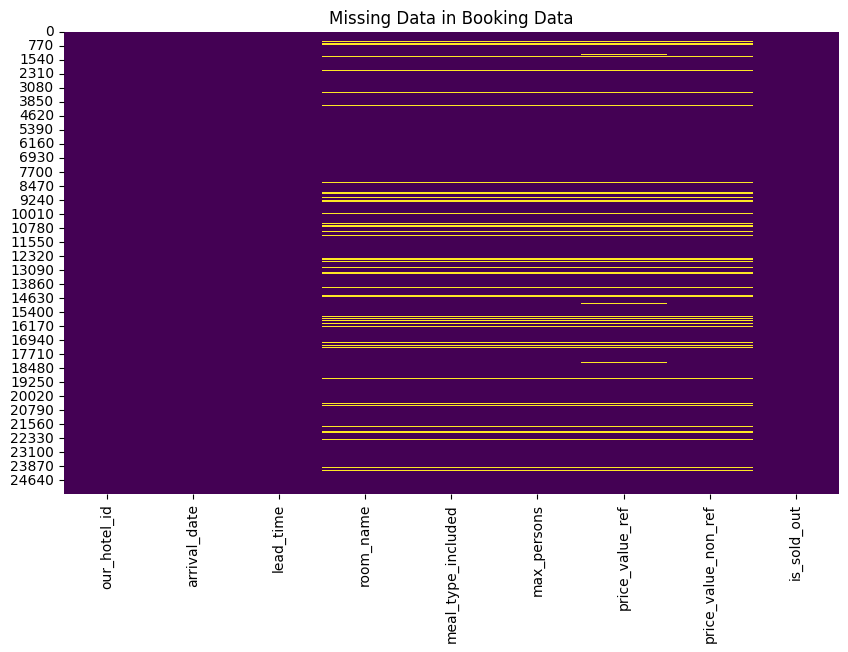

In [ ]:
# Heatmap for booking Data
plt.figure(figsize=(10, 6))
sns.heatmap(booking_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data in Booking Data")
plt.show()

> 💡 The results show that the dataset has missing values concentrated in specific columns. Notably, the columns room_name, meal_type_included, max_persons, and price_value_non_ref each have 10.34% missing values, while price_value_ref has a slightly higher 10.97% missing values. Other columns such as our_hotel_id, arrival_date, lead_time, and is_sold_out have no missing data. The heatmap visually highlights these missing values as yellow lines across the dataset rows, revealing a consistent pattern of missing data in the affected columns, suggesting that these issues may be linked to specific records or categories.








***

### 4.3.4 Rows with a significant number of missing values across columns

> ℹ This script identifies rows in the booking_data dataset with a high proportion of missing values. First, it counts the number of missing values for each row and stores this count in a new column, missing_count. A threshold is defined as 40% of the total number of columns, and rows with more missing values than this threshold are identified and displayed. The script then calculates and prints the percentage of rows with significant missing data, helping to assess how much of the dataset might require cleaning or removal.









In [ ]:
# Count the number of missing values in each row
booking_data['missing_count'] = booking_data.isnull().sum(axis=1)

# Define a threshold for missing data (e.g., 40% of total columns)
threshold = 0.4 * booking_data.shape[1]

# Identify rows with a lot of missing data
rows_with_lots_of_missing = booking_data[booking_data['missing_count'] > threshold]

# Display these rows
display(rows_with_lots_of_missing)

# Calculate the percentage of rows with a lot of missing data
percentage_rows_with_missing = (len(rows_with_lots_of_missing) / len(booking_data)) * 100

# Display the percentage
print(f"Percentage of rows with a lot of missing data: {percentage_rows_with_missing:.2f}%")


our_hotel_id arrival_date  lead_time room_name meal_type_included  \
540        17378898   2021-01-23          1       NaN                NaN   
541        17378898   2021-01-24          2       NaN                NaN   
542        17378898   2021-01-25          3       NaN                NaN   
543        17378898   2021-01-26          4       NaN                NaN   
544        17378898   2021-01-27          5       NaN                NaN   
...             ...          ...        ...       ...                ...   
25360       9590761   2021-04-03         71       NaN                NaN   
25361       9590761   2021-04-04         72       NaN                NaN   
25373       9590761   2021-04-16         84       NaN                NaN   
25374       9590761   2021-04-17         85       NaN                NaN   
25375       9590761   2021-04-18         86       NaN                NaN   

       max_persons  price_value_ref  price_value_non_ref  is_sold_out  \
540            NaN              NaN                  NaN         True   
541            NaN              NaN                  NaN         True   
542            NaN              NaN                  NaN         True   
543            NaN              NaN                  NaN         True   
544            NaN              NaN                  NaN         True   
...            ...              ...                  ...          ...   
25360          NaN              NaN                  NaN         True   
25361          NaN              NaN                  NaN         True   
25373          NaN              NaN                  NaN         True   
25374          NaN              NaN                  NaN         True   
25375          NaN              NaN                  NaN         True   

       missing_count  
540                5  
541                5  
542                5  
543                5  
544                5  
...              ...  
25360              5  
25361              5  
25373              5  
25374              5  
25375              5  

[2624 rows x 10 columns]

Percentage of rows with a lot of missing data: 10.34%


> 💡  The results indicate that 10.34% of rows in the dataset have a significant amount of missing data, defined as more than 40% of columns (5 out of 9 in this case) containing null values.  These rows appear to be typically identified where the value for is sold_out is TRUE.

***

### 4.3.5 Pre-Analysis of 'is_sold_out'

> ℹ The code analyzes the is_sold_out column by counting and calculating the percentage of rows marked as "Sold Out" (True) versus "Not Sold Out" (False). It also identifies rows with a majority of missing data (more than 40% of columns) and "Sold Out" status, calculating their count and percentage relative to all "Sold Out" rows. Finally, it visualizes the proportion of "Sold Out" versus "Not Sold Out" rows using a bar plot, providing insights into the distribution and quality of the dataset for these categories

In [ ]:
# Count the number of rows for "Sold Out" (True) and "Not Sold Out" (False)
sold_out_counts = booking_data['is_sold_out'].value_counts()

# Print the result
print("Number of rows for each Sold Out status:")
print(sold_out_counts)

Number of rows for each Sold Out status:
is_sold_out
False    22756
True      2624
Name: count, dtype: int64


In [ ]:
# Define a threshold for "majority missing" (e.g., more than 50% of columns are NaN)
threshold = booking_data.shape[1] * 0.40  # 50% of columns

# Count rows with majority NaN values and 'is_sold_out' as True
sold_out_with_majority_nan = booking_data[
    (booking_data['is_sold_out'] == True) &
    (booking_data.isnull().sum(axis=1) > threshold)
]

# Count the total number of such rows
sold_out_nan_count = len(sold_out_with_majority_nan)

# Count the total number of rows where 'is_sold_out' is True
sold_out_counts = booking_data['is_sold_out'].value_counts()

# Print the results
print(f"Number of 'Sold Out' rows with a majority of columns as NaN: {sold_out_nan_count}")
print(f"Total rows with 'Sold Out' status: {sold_out_counts.get(True, 0)}")
print(f"Percentage of 'Sold Out' rows with majority NaN: {(sold_out_nan_count / sold_out_counts.get(True, 1)) * 100:.2f}%")

Number of 'Sold Out' rows with a majority of columns as NaN: 2624
Total rows with 'Sold Out' status: 2624
Percentage of 'Sold Out' rows with majority NaN: 100.00%


In [ ]:
# Count the number of rows for "Sold Out" (True) and "Not Sold Out" (False)
sold_out_counts = booking_data['is_sold_out'].value_counts()

# Total number of rows
total_rows = booking_data.shape[0]

# Calculate percentages
sold_out_percentage = (sold_out_counts[True] / total_rows) * 100
not_sold_out_percentage = (sold_out_counts[False] / total_rows) * 100

# Print the results
print(f"Percentage of Sold Out rows: {sold_out_percentage:.2f}%")
print(f"Percentage of Not Sold Out rows: {not_sold_out_percentage:.2f}%")

Percentage of Sold Out rows: 10.34%
Percentage of Not Sold Out rows: 89.66%


/var/folders/r1/7q7bk_397yxc5xp5rbsj60wm0000gn/T/ipykernel_79265/1023870452.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Status", y="Percentage", data=data, palette="viridis")


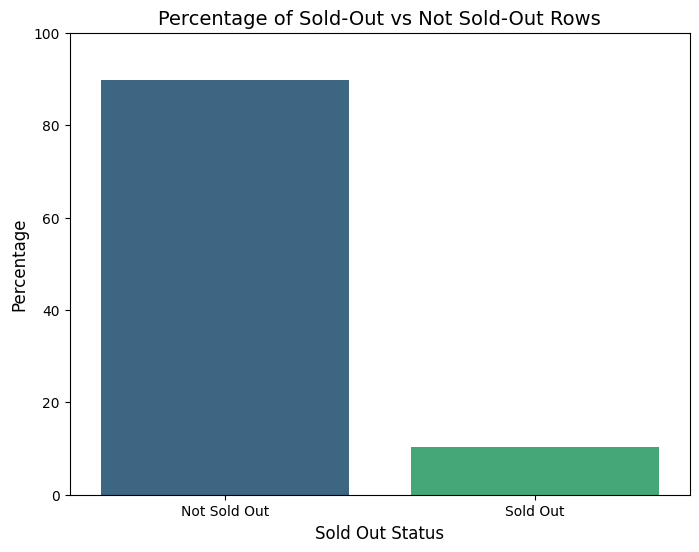

In [ ]:
# Example values (replace with actual percentages)
sold_out_percentage = 10.34
not_sold_out_percentage = 89.66

# Create a DataFrame for visualization
data = pd.DataFrame({
    "Status": ["Not Sold Out", "Sold Out"],
    "Percentage": [not_sold_out_percentage, sold_out_percentage]
})

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Status", y="Percentage", data=data, palette="viridis")

# Add labels, title, and formatting
plt.title("Percentage of Sold-Out vs Not Sold-Out Rows", fontsize=14)
plt.xlabel("Sold Out Status", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.ylim(0, 100)
plt.show()


> 💡  The results indicate that the dataset has a total of 25,380 rows, of which 2,624 rows (10.34%) are marked as "Sold Out," while the remaining 22,756 rows (89.66%) are "Not Sold Out." Interestingly, all rows marked as "Sold Out" have a majority of their columns containing missing (NaN) values, making up 100% of the sold-out rows. This suggests that when rooms are sold out, their data might not be fully recorded or made available in the dataset, highlighting a potential data quality issue for further investigation. The visualization reinforces this, showing a significant imbalance between "Not Sold Out" and "Sold Out" rows.

***

### 4.3.6 Pre-Analysis of 'room_name'



> ℹ This script cleans and analyzes the room_name column in the booking_data DataFrame by converting it to a categorical type to optimize memory usage, counting the occurrences of each unique room name, and visualizing their distribution using a bar chart. It calculates both the frequency and relative percentage of each room name, creating a summary table for detailed insights. Additionally, it refines the room names into broader categories (e.g., "Small Double," "Suite") using a custom function, groups similar room types, and visualizes the distribution of these refined categories to provide a clearer overview of room types in the dataset.








In [ ]:
# Convert 'room_name' to category
booking_data['room_name'] = booking_data['room_name'].astype('category')

# Verify the data types after conversion
print(booking_data.dtypes)

our_hotel_id              int64
arrival_date             object
lead_time                 int64
room_name              category
meal_type_included       object
max_persons             float64
price_value_ref         float64
price_value_non_ref     float64
is_sold_out                bool
missing_count             int64
dtype: object


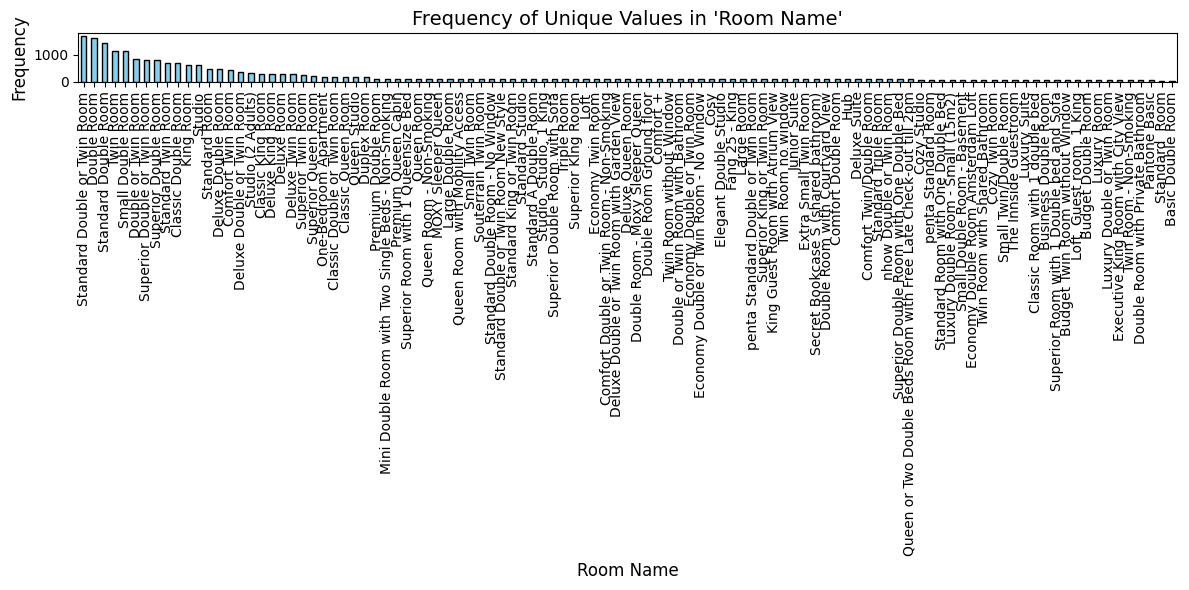

In [ ]:
# Count the occurrences of each unique value in 'room_name'
room_name_counts = booking_data['room_name'].value_counts()

# Plot a bar chart for the counts
plt.figure(figsize=(12, 6))
room_name_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Frequency of Unique Values in 'Room Name'", fontsize=14)
plt.xlabel("Room Name", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [ ]:
# Calculate the frequency of all room names
all_room_name_counts = booking_data['room_name'].value_counts()

# Calculate the relative percentage for all room names
all_room_name_percentage = (all_room_name_counts / len(booking_data)) * 100

# Combine counts and percentages into a DataFrame
all_room_name_table = pd.DataFrame({
    'Room Name': all_room_name_counts.index,
    'Frequency': all_room_name_counts.values,
    'Relative Percentage': all_room_name_percentage.values
}).reset_index(drop=True)

# Display the table
print(all_room_name_table)

                             Room Name  Frequency  Relative Percentage
0         Standard Double or Twin Room       1704             6.713948
1                          Double Room       1611             6.347518
2                 Standard Double Room       1426             5.618597
3                            Twin Room       1137             4.479905
4                    Small Double Room       1131             4.456265
..                                 ...        ...                  ...
100            Twin Room - Non-Smoking         52             0.204886
101  Double Room with Private Bathroom         52             0.204886
102                      Pantone Basic         51             0.200946
103                     Standard  Room         37             0.145784
104                  Basic Double Room         22             0.086682

[105 rows x 3 columns]


In [ ]:
# Check unique values for categorical columns
print("Unique values in 'room_name':")
print(booking_data['room_name'].unique())

Unique values in 'room_name':
['Small Double Room', 'One-Bedroom Apartment', 'Standard Double Room', 'Deluxe Double Room', 'Elegant Double Studio', ..., 'Standard Studio', 'Economy Double or Twin Room - No Window', 'Deluxe Suite', 'nhow Double or Twin Room', 'Premium Queen Cabin']
Length: 106
Categories (105, object): ['Basic Double Room', 'Budget Double Room', 'Budget Twin Room without Window', 'Business Double Room', ..., 'Twin Room without Window', 'nhow Double or Twin Room', 'penta Standard Double or Twin Room', 'penta Standard Room']


In [ ]:
def categorize_room(name):
    if pd.isna(name):
        return 'Unknown'

    name = name.lower()

    # Priority-based specific mappings
    if 'small double' in name:
        return 'Small Double'
    elif 'deluxe double' in name:
        return 'Deluxe Double'
    elif 'double' in name:
        return 'Double'
    elif 'king' in name:
        return 'King'
    elif 'queen' in name:
        return 'Queen'
    elif 'suite' in name or 'duplex' in name:
        return 'Suite'
    elif 'twin' in name:
        return 'Twin'
    elif 'studio' in name:
        return 'Studio'
    elif 'single' in name:
        return 'Single'
    elif 'apartment' in name:
        return 'Apartment'
    elif 'economy' in name:
        return 'Economy'
    elif 'superior' in name:
        return 'Superior'
    elif 'standard' in name:
        return 'Standard'
    elif 'luxury' in name:
        return 'Luxury'
    else:
        return 'Other'

# Apply the function to the room_name column
booking_data['room_category'] = booking_data['room_name'].apply(categorize_room)

room_category
Double           10640
Twin              3545
King              1954
Small Double      1211
Queen             1091
Studio            1083
Other             1019
Deluxe Double      900
Standard           676
Suite              404
Apartment          180
Luxury              53
Name: count, dtype: int64


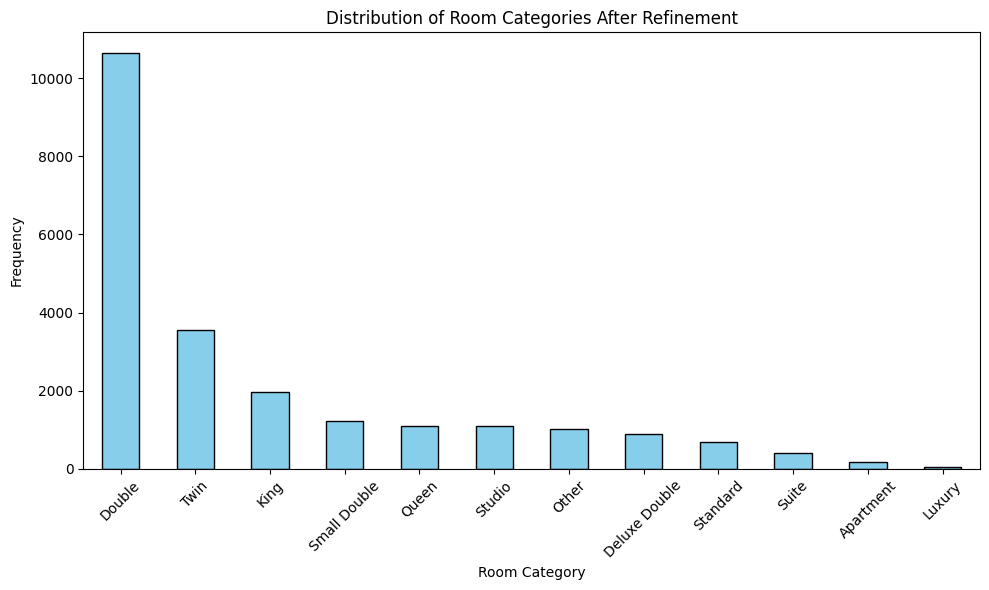

In [ ]:
# Check the distribution of categories
print(booking_data['room_category'].value_counts())

# Visualize the distribution
plt.figure(figsize=(10, 6))
booking_data['room_category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Room Categories After Refinement")
plt.xlabel("Room Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

>💡The analysis reveals that the room_name column contains 106 unique values, which was here grouped into 12 categories. A categorization function grouped room names into broader categories like "Double," "Twin," and "Suite," with "Double" being the dominant category (10,640 entries, about 42% of the data). The visualizations highlight this distribution, showing a sharp concentration in a few categories while others, such as "Luxury" and "Apartment," have relatively low frequencies, providing a refined view of room types for further analysis.








***

### 4.3.7 Pre-Analysis of 'meal_type_included'

> ℹ This script converts the meal_type_included column from the object data type to category to optimize memory usage and performance. It then calculates the frequency and proportion of each unique value in the column, including missing or blank values, and compiles these into a summary table for easy analysis. Additionally, it counts rows containing empty strings or whitespace within the column, providing a detailed overview of the distribution and completeness of the meal_type_included data.








In [ ]:
# datatype change from object to category
booking_data['meal_type_included'] = booking_data['meal_type_included'].astype('category')
print(booking_data['meal_type_included'].dtypes)

# Calculate the total number of rows
total_rows = booking_data.shape[0]

# Calculate the frequency of each unique value in 'meal_type_included', including blanks
meal_type_counts = booking_data['meal_type_included'].value_counts(dropna=False)

# Calculate the proportion of each value, including blanks
meal_type_proportions = (meal_type_counts / total_rows) * 100

# Combine counts and proportions into a DataFrame
meal_type_summary = pd.DataFrame({
    'Meal Type': meal_type_counts.index,
    'Frequency': meal_type_counts.values,
    'Proportion (%)': meal_type_proportions.values
})

# Display the summary table
print(meal_type_summary)

category
   Meal Type  Frequency  Proportion (%)
0       NONE      20207       79.617809
1        NaN       2624       10.338849
2  BREAKFAST       2549       10.043341


In [ ]:
# Count empty strings or whitespace
blank_rows = booking_data['meal_type_included'].str.strip().eq('').sum()
print(f"Number of blank (empty or whitespace) rows: {blank_rows}")

Number of blank (empty or whitespace) rows: 0


> 💡The results indicate that the majority of the rows (79.62%) in the meal_type_included column have "NONE" as the meal type, meaning no meals are included for most bookings. A smaller proportion (10.04%) have "BREAKFAST" included, representing bookings where breakfast is provided. Additionally, 10.34% of the rows have missing values (NaN), indicating that meal type information is unavailable for these bookings. This breakdown highlights that the dataset is dominated by bookings without meals, with a nearly equal split between missing values and those offering breakfast.








### 4.3.8 Pre-Analysis of 'arrival_date'








> ℹ This script examines the arrival_date column in the booking_data DataFrame to assess data quality and identify date ranges. It first counts the number of missing (NaT) values using the .isna().sum() method to check for gaps in the data. Then, it calculates and prints the earliest and latest dates in the column using the .min() and .max() methods, respectively. This provides insights into the completeness of the date data and the time period covered by the dataset.








In [ ]:
# Count the number of missing (NaT) values in 'arrival_date'
missing_count = booking_data['arrival_date'].isna().sum()

print(f"Number of missing (NaT) values in 'arrival_date': {missing_count}")

Number of missing (NaT) values in 'arrival_date': 0


In [ ]:
print(f"Earliest date in the dataset: {booking_data['arrival_date'].min()}")
print(f"Latest date in the dataset: {booking_data['arrival_date'].max()}")

Earliest date in the dataset: 2021-01-23
Latest date in the dataset: 2021-04-22


> 💡  The results show that there are no missing values (NaT) in the arrival_date column, indicating the data is complete for this field. The earliest recorded arrival date in the dataset is January 23, 2021, and the latest is April 22, 2021. This confirms that the dataset covers a booking period of nearly three months without gaps in the arrival date information.








***

### 4.3.9 Pre-Analysis of 'max_persons'

> ℹ This script analyzes the max_persons column in the booking_data dataset by determining its data type, counting the number of missing (NaN) values, and calculating their percentage relative to the total rows. It then provides a statistical summary of the column using .describe() and visualizes the data distribution through a histogram and a boxplot. Finally, it filters and displays rows where the value of max_persons equals 3, allowing a closer inspection of those specific entries. This comprehensive analysis helps to understand the column's data quality, distribution, and outliers.








In [ ]:
print(booking_data['max_persons'].dtypes)


float64


In [ ]:
# Count the number of NaN values
missing_max_persons = booking_data['max_persons'].isna().sum()

# Calculate the percentage of NaN values
total_rows = booking_data.shape[0]
missing_percentage = (missing_max_persons / total_rows) * 100

print(f"Missing values: {missing_max_persons}")
print(f"Percentage missing: {missing_percentage:.2f}%")

Missing values: 2624
Percentage missing: 10.34%


In [ ]:
 print(booking_data['max_persons'].describe())

count    22756.000000
mean         2.003955
std          0.062766
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: max_persons, dtype: float64


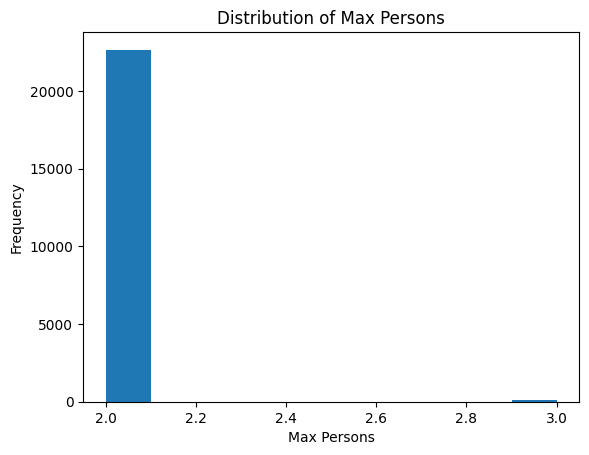

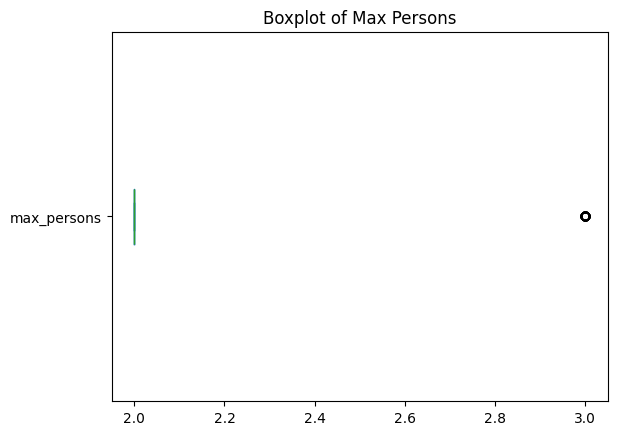

In [ ]:
# Histogram
booking_data['max_persons'].plot(kind='hist', bins=10, title='Distribution of Max Persons')
plt.xlabel('Max Persons')
plt.ylabel('Frequency')
plt.show()

# Boxplot
booking_data['max_persons'].plot(kind='box', vert=False, title='Boxplot of Max Persons')
plt.show()

In [ ]:
# Filter rows where 'max_persons' is equal to 3
rows_with_3 = booking_data[booking_data['max_persons'] == 3]

# Display the rows
print("Rows where 'max_persons' is equal to 3:")
print(rows_with_3)


Rows where 'max_persons' is equal to 3:
       our_hotel_id arrival_date  lead_time              room_name  \
15480       3185815   2021-01-23          1  One-Bedroom Apartment   
15481       3185815   2021-01-24          2  One-Bedroom Apartment   
15482       3185815   2021-01-25          3  One-Bedroom Apartment   
15483       3185815   2021-01-26          4  One-Bedroom Apartment   
15484       3185815   2021-01-27          5  One-Bedroom Apartment   
...             ...          ...        ...                    ...   
15565       3185815   2021-04-18         86  One-Bedroom Apartment   
15566       3185815   2021-04-19         87  One-Bedroom Apartment   
15567       3185815   2021-04-20         88  One-Bedroom Apartment   
15568       3185815   2021-04-21         89  One-Bedroom Apartment   
15569       3185815   2021-04-22         90  One-Bedroom Apartment   

      meal_type_included  max_persons  price_value_ref  price_value_non_ref  \
15480               NONE          3.0   

> 💡 The analysis of the max_persons column reveals that 10.34% of the rows have missing (NaN) values, while the majority of the valid entries are clustered around the value of 2, as indicated by the mean, quartiles, and histogram. The maximum value in the column is 3, which appears to be an outlier based on the boxplot. Filtering for rows where max_persons equals 3 shows that these correspond to bookings for a "One-Bedroom Apartment" at a specific hotel (our_hotel_id = 3185815). This suggests that such rooms can accommodate more guests compared to the majority of rooms, which are designed for two persons. This analysis highlights the consistency of the data for most entries while identifying specific cases with higher capacity.








***

### 4.3.10 Pre-Analysis of our_hotel_id

> ℹ This script analyzes the our_hotel_id column in the booking_data DataFrame by first checking for any missing values and then counting the number of unique hotel IDs, which represent distinct hotels in the dataset. It calculates the frequency of occurrences for each unique hotel ID using .value_counts() to identify which hotels have the most or least bookings. The results are displayed, and a line plot is generated to visualize the frequency distribution of bookings across hotel IDs, with markers and a grid added for clarity and readability, making it easier to identify patterns or trends in hotel bookings.








In [ ]:
# Check for missing values specifically in the 'our_hotel_id' column
missing_our_hotel_id = booking_data['our_hotel_id'].isnull().sum()

In [ ]:
# Count the number of unique values in the 'hotel_id' column
unique_hotel_ids = booking_data['our_hotel_id'].nunique()

# Display the result
print(f"Number of unique Hotel IDs: {unique_hotel_ids}")

Number of unique Hotel IDs: 282


In [ ]:
# Count the frequency of each unique hotel_id
hotel_id_counts = booking_data['our_hotel_id'].value_counts()
# Display the frequency
print(hotel_id_counts)


our_hotel_id
12112537    90
3284517     90
3308524     90
3299098     90
3291521     90
            ..
3168361     90
3169376     90
3169387     90
3169398     90
9590761     90
Name: count, Length: 282, dtype: int64


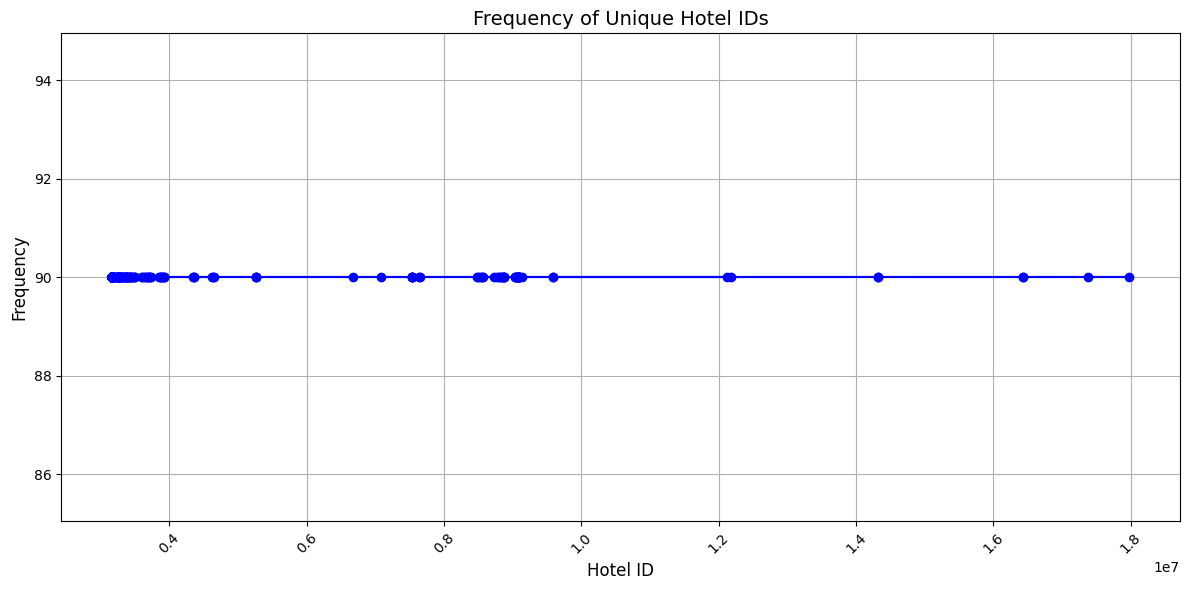

In [ ]:
# Plot the frequency of hotel_id using a line plot
plt.figure(figsize=(12, 6))
plt.plot(hotel_id_counts.index, hotel_id_counts.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title("Frequency of Unique Hotel IDs", fontsize=14)
plt.xlabel("Hotel ID", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for better visualization
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

> 💡 The chart shows the frequency distribution of unique hotel IDs, where each hotel ID is associated with a frequency of 90. This means that for all 282 unique hotel IDs, the count is consistently 90, indicating an equal distribution of occurrences across these IDs. The uniformity suggests a controlled dataset, likely indicating a pre-determined or structured pattern in the data collection.

***

### 4.3.11 Pre-Analysis of lead_time

ℹ The code uses Python's matplotlib library to visualize data, and the plt.show() function specifically renders the created boxplot for display.

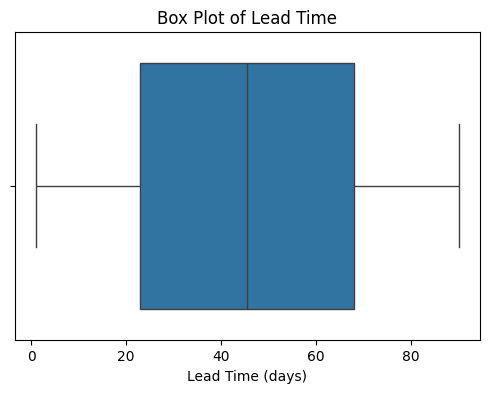

Lead Time Statistics:
count    25380.00000
mean        45.50000
std         25.97967
min          1.00000
25%         23.00000
50%         45.50000
75%         68.00000
max         90.00000
Name: lead_time, dtype: float64


In [ ]:
# Create a box plot for 'lead_time'
plt.figure(figsize=(6, 4))
sns.boxplot(x=booking_data['lead_time'])

# Add title and labels
plt.title('Box Plot of Lead Time')
plt.xlabel('Lead Time (days)')

# Display the plot
plt.show()

# Calculate and display statistical values
lead_time_stats = booking_data['lead_time'].describe()
print("Lead Time Statistics:")
print(lead_time_stats)


> 💡 The relatively symmetrical box and whiskers suggest a fairly uniform distribution with no significant outliers, and the standard deviation of 25.98 days indicates moderate variability in lead times

***

### 4.3.12 Pre-Analysis of 'price_value_ref' and 'price_value_non_ref'

> ℹ The script  analyzes missing values in price_value_ref and price_value_non_ref, calculates their percentages, and drops rows with null values. It compares the distributions of refundable and non-refundable prices using a box plot and performs a paired t-test to determine if their means differ significantly. Results are interpreted based on the p-value.

In [ ]:
# Check for missing values in both columns
missing_price_ref = booking_data['price_value_ref'].isna().sum()
missing_price_non_ref = booking_data['price_value_non_ref'].isna().sum()

# Calculate percentages of missing values
total_rows = booking_data.shape[0]
missing_price_ref_percentage = (missing_price_ref / total_rows) * 100
missing_price_non_ref_percentage = (missing_price_non_ref / total_rows) * 100

# Print the results
print(f"Missing values in 'price_value_ref': {missing_price_ref} ({missing_price_ref_percentage:.2f}%)")
print(f"Missing values in 'price_value_non_ref': {missing_price_non_ref} ({missing_price_non_ref_percentage:.2f}%)")

Missing values in 'price_value_ref': 2783 (10.97%)
Missing values in 'price_value_non_ref': 2624 (10.34%)


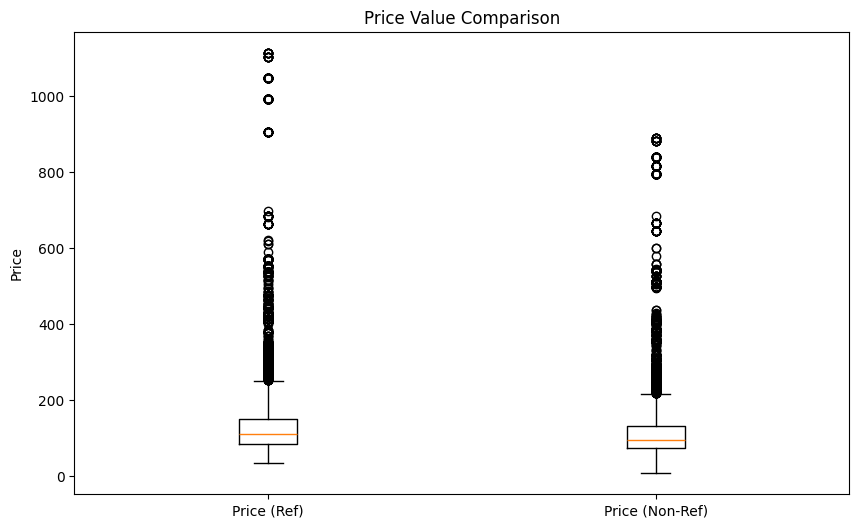

T-statistic: 154.7531, P-value: 0.0000
Significant difference found between Price (Ref) and Price (Non-Ref).


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Drop rows with missing values in price columns
price_data = booking_data[['price_value_ref', 'price_value_non_ref']].dropna()

# Visualize distributions
plt.figure(figsize=(10, 6))
plt.boxplot([price_data['price_value_ref'], price_data['price_value_non_ref']], labels=['Price (Ref)', 'Price (Non-Ref)'])
plt.title('Price Value Comparison')
plt.ylabel('Price')
plt.show()

# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(price_data['price_value_ref'], price_data['price_value_non_ref'])

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Interpret the result
if p_value > 0.05:
    print("No significant difference between Price (Ref) and Price (Non-Ref).")
else:
    print("Significant difference found between Price (Ref) and Price (Non-Ref).")

> 💡 The analysis revealed that 10.97% of the data in the price_value_ref column and 10.34% in the price_value_non_ref column are missing. These rows were removed to ensure accurate comparisons. The box plot shows that prices for both refundable (Price Ref) and non-refundable (Price Non-Ref) options have similar distributions but differ significantly in their means, as confirmed by a paired t-test (T-statistic: 154.7531, P-value: 0.0000). This indicates a statistically significant difference between the two price types, with non-refundable options generally being lower-priced, as visible from the plot and the test results.








***

## 4.4 Hotels Information Dataset
### 4.4.1 Displaying the dataset, checking datatypes and number of rows, and missing values

> ℹ The code displays the hotels_information DataFrame and uses info() to summarize its structure, showing the number of rows, column names, non-null counts, and data types. This helps assess the dataset's completeness and structure for analysis.








In [ ]:
display (hotels_information)

our_hotel_id                              name  review_score  stars  \
0         3169410      Hotel Indigo Brussels - City           8.4    4.0   
1         3162064            Facade Hotel Amsterdam           7.6    2.0   
2         8482738                      Chasse Hotel           8.7    4.0   
3         3169579                Hotel Le Châtelain           8.9    5.0   
4         3922332  The Student Hotel Amsterdam City           8.7    4.0   
..            ...                               ...           ...    ...   
277       3162347    NH Collection Amsterdam Doelen           8.9    5.0   
278       3169400      Thon Hotel Bristol Stephanie          -1.0    NaN   
279       9068693                        Via Suites           8.4    4.0   
280       3169491   Sheraton Brussels Airport Hotel           8.5    4.0   
281       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   

      latitude  longitude  room_count  
0    50.855711   4.359679       283.0  
1    52.374966   4.899320        30.0  
2    52.369583   4.861395        37.0  
3    50.826103   4.363769       107.0  
4    52.354594   4.912632       200.0  
..         ...        ...         ...  
277  52.368219   4.895726        81.0  
278  50.831528   4.358980       142.0  
279  52.326115   4.953687        26.0  
280  50.897207   4.483066       294.0  
281  50.846179   4.354423        22.0  

[282 rows x 7 columns]

In [ ]:
hotels_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   our_hotel_id  282 non-null    int64  
 1   name          282 non-null    object 
 2   review_score  281 non-null    float64
 3   stars         267 non-null    float64
 4   latitude      282 non-null    float64
 5   longitude     282 non-null    float64
 6   room_count    272 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


> 💡The hotels_information DataFrame has 282 entries and 7 columns, including our_hotel_id, name, review_score, stars, latitude, longitude, and room_count. The info() summary reveals that our_hotel_id, name, latitude, and longitude are complete, while review_score, stars, and room_count have missing values. Columns include integers, floats, and strings, with the dataset using 15.6 KB of memory.







### 4.4.2 Missing values

> ℹ Display the count of missing values in the booking data.

In [ ]:
# Display the number of missing values in the booking Data
print("Missing Values in Hotel dataset")
print(hotels_information.isnull().sum())

Missing Values in Hotel dataset
our_hotel_id     0
name             0
review_score     1
stars           15
latitude         0
longitude        0
room_count      10
dtype: int64


>💡 Review_score, stars, and room_count have missing values (1, 15, and 10, respectively)

***

### 4.4.3 Pre-Analysis of 'our_hotel_id' and 'name'

> ℹ The script counts unique values in our_hotel_id and name to verify if each hotel ID uniquely corresponds to one name. If the counts match, it confirms a one-to-one relationship; otherwise, it highlights inconsistencies in the dataset.








In [ ]:
# Count the number of unique values in 'our_hotel_id' and 'name'
unique_hotel_ids = hotels_information['our_hotel_id'].nunique()
unique_hotel_names = hotels_information['name'].nunique()

# Display the counts
print(f"Number of unique hotel IDs: {unique_hotel_ids}")
print(f"Number of unique hotel names: {unique_hotel_names}")

# Conclusion
if unique_hotel_ids == unique_hotel_names:
    print("Each 'our_hotel_id' is uniquely related to one 'name'.")
else:
    print("Some 'our_hotel_id' values are related to multiple names or vice versa.")

Number of unique hotel IDs: 282
Number of unique hotel names: 282
Each 'our_hotel_id' is uniquely related to one 'name'.


> 💡 The results show that there are 282 unique hotel IDs and 282 unique hotel names, confirming that each our_hotel_id is uniquely associated with one name, indicating a one-to-one relationship in the dataset.








***

### 4.4.4 Pre-Analysis of 'room_count'

> ℹ The script identifies rows with missing room_count values in the hotels_information dataset and displays the corresponding our_hotel_id, name, and room_count. Using a predefined dictionary of hotel names and their room counts sourced from online information (such as Booking.com and TripAdvisor), it updates the missing values by matching on the name column. Finally, it verifies that all missing values in the room_count column have been resolved, ensuring the dataset is complete and accurate.

In [ ]:
# Display the rows with missing 'room_count' values
missing_room_count_data = hotels_information[hotels_information['room_count'].isnull()]

# Display the relevant columns (hotel ID, name, and room count)
print(missing_room_count_data[['our_hotel_id', 'name', 'room_count']])


     our_hotel_id                                       name  room_count
22       16424438               Adagio Access Brussels Delta         NaN
50       12112537                        Hotel Mai Amsterdam         NaN
67        9590761                     Cityden Amsterdam West         NaN
69        8770352  Holiday Inn Express Amsterdam - City Hall         NaN
168       8864816                 Postillion Hotel Amsterdam         NaN
176      17378898                 INNSiDE by Meliá Amsterdam         NaN
191      16433964            Moxy Amsterdam Schiphol Airport         NaN
216       9035879    Skotel Amsterdam, Hotelschool The Hague         NaN
234      14323546                         TSH Amsterdam West         NaN
276      12176038              PREMIER SUITES PLUS Amsterdam         NaN


In [ ]:
# Define the hotel names and their corresponding room counts
room_counts = {
    'Adagio Access Brussels Delta': 110,
    'Hotel Mai Amsterdam': 239,
    'Cityden Amsterdam West': 150,
    'Holiday Inn Express Amsterdam - City Hall': 314,
    'Postillion Hotel Amsterdam': 120,
    'INNSiDE by Meliá Amsterdam': 318,
    'Moxy Amsterdam Schiphol Airport': 260,
    'Skotel Amsterdam, Hotelschool The Hague': 300,
    'TSH Amsterdam West': 500,
    'PREMIER SUITES PLUS Amsterdam': 100
}

# Update the 'room_count' column in your DataFrame
for hotel_name, count in room_counts.items():
    hotels_information.loc[hotels_information['name'] == hotel_name, 'room_count'] = count


In [ ]:
# Count the number of missing values in the 'room_count' column
missing_room_count = hotels_information['room_count'].isnull().sum()

# Display the count of missing values in 'room_count'
print(f"Number of missing values in 'room_count': {missing_room_count}")


Number of missing values in 'room_count': 0


> 💡 Data for all missing hotels were found online and dataset was completed with info

***

### 4.4.5 Pre-Analysis of 'stars'

> ℹThe script resolves missing stars values in the hotels_information dataset using online information (such as Booking.com and TripAdvisor). It identifies missing entries, updates them based on a dictionary mapping our_hotel_id to star ratings, and verifies that all missing values are filled, ensuring the stars column is complete.









In [ ]:
# Filter rows where 'stars' is missing
missing_stars_data = hotels_information[hotels_information['stars'].isnull()]

# Display the relevant columns for missing values
print(missing_stars_data[['our_hotel_id', 'name', 'stars']])

     our_hotel_id                                          name  stars
28        3224920                                 Acostar Hotel    NaN
40        3170500           Brussels Marriott Hotel Grand Place    NaN
73        3169760                  Holiday Inn Brussels Schuman    NaN
100       4359518                             CityHub Amsterdam    NaN
105       3169580        Hotel Novotel Brussels Off Grand Place    NaN
146       8733715              MEININGER Hotel Amsterdam Amstel    NaN
161       3169520                             NH Brussels Bloom    NaN
176      17378898                    INNSiDE by Meliá Amsterdam    NaN
182       3162240                                   Rokin Hotel    NaN
191      16433964               Moxy Amsterdam Schiphol Airport    NaN
203       3162060                Hotel Asterisk 3 star superior    NaN
208      17975980  Holiday Inn Express - Brussels - Grand-Place    NaN
218       9083977                       ROXI Residence Brussels    NaN
230   

In [ ]:
# Define the hotels with missing 'stars' and their corresponding stars values
missing_stars_dict = {
    3224920: 3,  # Acostar Hotel
    3170500: 5,  # Brussels Marriott Hotel Grand Place
    3169760: 4,  # Holiday Inn Brussels Schuman
    4359518: 3,  # CityHub Amsterdam
    3169580: 4,  # Hotel Novotel Brussels Off Grand Place
    8733715: 4,  # MEININGER Hotel Amsterdam Amstel
    3169520: 4,  # NH Brussels Bloom
    17378898: 4, # INNSiDE by Meliá Amsterdam
    3162240: 3,  # Rokin Hotel
    16433964: 3, # Moxy Amsterdam Schiphol Airport
    3162060: 3,  # Hotel Asterisk 3 star superior
    17975980: 3, # Holiday Inn Express - Brussels - Grand-Place
    9083977: 3,  # ROXI Residence Brussels
    3725202: 3,  # Hotel Not Hotel
    3169400: 4   # Thon Hotel Bristol Stephanie
}

# Update the 'stars' column directly using the dictionary
for hotel_id, star_rating in missing_stars_dict.items():
    hotels_information.loc[hotels_information['our_hotel_id'] == hotel_id, 'stars'] = star_rating

# Display the updated DataFrame with the 'stars' column
print(hotels_information[['our_hotel_id', 'name', 'stars']])

     our_hotel_id                              name  stars
0         3169410      Hotel Indigo Brussels - City    4.0
1         3162064            Facade Hotel Amsterdam    2.0
2         8482738                      Chasse Hotel    4.0
3         3169579                Hotel Le Châtelain    5.0
4         3922332  The Student Hotel Amsterdam City    4.0
..            ...                               ...    ...
277       3162347    NH Collection Amsterdam Doelen    5.0
278       3169400      Thon Hotel Bristol Stephanie    4.0
279       9068693                        Via Suites    4.0
280       3169491   Sheraton Brussels Airport Hotel    4.0
281       6672645  Hotel Agora Brussels Grand Place    3.0

[282 rows x 3 columns]


In [ ]:
# Check for missing values in the 'updated_stars' column
missing_updated_stars = hotels_information['stars'].isnull().sum()

# Display the count of missing values in the 'updated_stars' column
print(f"Missing values in 'stars': {missing_updated_stars}")


Missing values in 'stars': 0


> 💡 All missing information was filled with data on stars found online

***

### 4.4.6 Pre-Analysis of 'review_score'


> ℹ The script analyzes and cleans the review_score column in the hotels_information dataset. It identifies rows with missing values (NaN) and negative review scores considered abnormal, replacing -1 values with NaN to standardize missing data. It calculates the percentage of rows with -1 and missing values, then excludes these rows for further analysis. A boxplot visualizes the distribution of valid review scores. Finally, the script filters rows without missing values in review_score and stars columns and computes the correlation coefficient between these two variables, providing insights into their relationship.


In [ ]:
# Filter and display the row with the missing value in 'review_score'
missing_review_score_row = hotels_information[hotels_information['review_score'].isnull()]
print(missing_review_score_row)

     our_hotel_id                        name  review_score  stars   latitude  \
176      17378898  INNSiDE by Meliá Amsterdam           NaN    4.0  52.339674   

     longitude  room_count  
176   4.871608       318.0  


In [ ]:
# Filter the rows where review_score is less than 0
negative_reviews = hotels_information[hotels_information['review_score'] < 0]

# Display the filtered rows
print(negative_reviews)

     our_hotel_id                                          name  review_score  \
28        3224920                                 Acostar Hotel          -1.0   
40        3170500           Brussels Marriott Hotel Grand Place          -1.0   
73        3169760                  Holiday Inn Brussels Schuman          -1.0   
105       3169580        Hotel Novotel Brussels Off Grand Place          -1.0   
161       3169520                             NH Brussels Bloom          -1.0   
182       3162240                                   Rokin Hotel          -1.0   
203       3162060                Hotel Asterisk 3 star superior          -1.0   
208      17975980  Holiday Inn Express - Brussels - Grand-Place          -1.0   
278       3169400                  Thon Hotel Bristol Stephanie          -1.0   

     stars   latitude  longitude  room_count  
28     3.0  52.365244   4.885768        30.0  
40     5.0  50.848711   4.348075       221.0  
73     4.0  50.840725   4.383821        62.0  
1

In [ ]:
# Total rows in the dataset
total_rows = len(hotels_information)

# Count rows with review_score == -1
negative_review_count = (hotels_information['review_score'] == -1).sum()

# Count rows with missing review_score (NaN)
missing_review_count = hotels_information['review_score'].isnull().sum()

# Calculate percentages
negative_percentage = (negative_review_count / total_rows) * 100
missing_percentage = (missing_review_count / total_rows) * 100

# Print results
print(f"Total rows: {total_rows}")
print(f"Rows with review_score = -1: {negative_review_count} ({negative_percentage:.2f}%)")
print(f"Rows with missing review_score: {missing_review_count} ({missing_percentage:.2f}%)")

Total rows: 282
Rows with review_score = -1: 9 (3.19%)
Rows with missing review_score: 1 (0.35%)


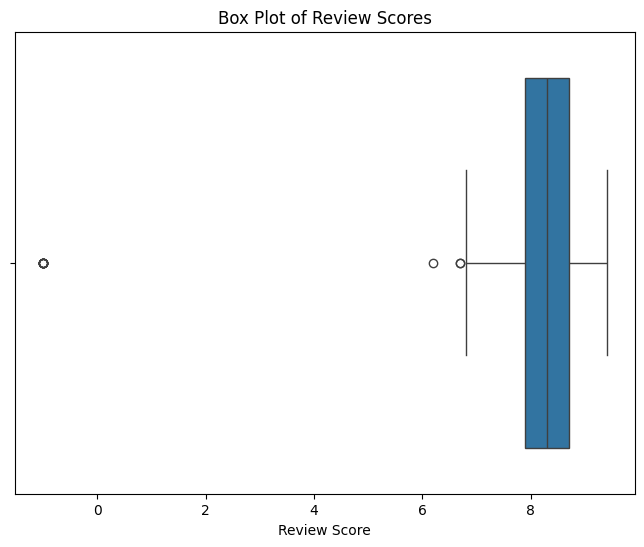

In [ ]:
# Exclude rows with missing values in 'review_score'
review_score_data = hotels_information['review_score'].dropna()

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=review_score_data)
plt.title('Box Plot of Review Scores')
plt.xlabel('Review Score')
plt.show()

In [ ]:
# Replace -1 with NaN in the 'review_score' column
import numpy as np
hotels_information['review_score'] = hotels_information['review_score'].replace(-1, np.nan)

# Verify changes
print(hotels_information['review_score'].isnull().sum())  # Should show combined count of NaN and previous -1 values

10


In [ ]:
# Filter out rows with missing values in 'review_score' or 'stars'
filtered_data = hotels_information[['review_score', 'stars']].dropna()

# Calculate the correlation coefficient
correlation = filtered_data['review_score'].corr(filtered_data['stars'])

# Display the result
print(f"Correlation between review_score and stars: {correlation:.2f}")

Correlation between review_score and stars: 0.45


> 💡The dataset contains 282 rows, with 9 rows having a review_score of -1 (3.19%) and 1 row with a missing (NaN) review_score (0.35%). The abnormal -1 values were replaced with NaN to standardize missing data, making a total of 10 missing values. A boxplot of the cleaned review_score data reveals a cluster around high scores (near 8) and a few outliers. After filtering out missing values, the correlation between review_score and stars was calculated as 0.45, indicating a moderate positive relationship between the two variables.







***

### 4.4.7 Pre-Analysis of 'latitude' and 'longitude'

> ℹ The script visualizes and categorizes hotels by location. It plots hotels' latitude and longitude to show their distribution and based cities were identified manually based on coordinates, adding this as a new city column. A color-coded scatter plot highlights hotel locations by city.






Index(['our_hotel_id', 'name', 'review_score', 'stars', 'latitude',
       'longitude', 'room_count'],
      dtype='object')


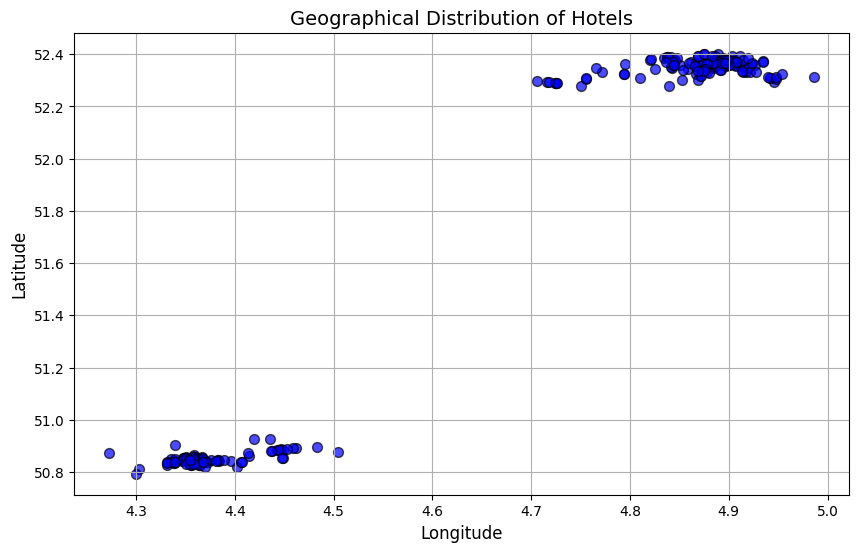

In [ ]:
# Ensure the dataset is loaded properly
print(hotels_information.columns)  # Check column names to confirm they are as expected

# Scatter plot of hotels based on latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(hotels_information['longitude'], hotels_information['latitude'], alpha=0.7, c='blue', edgecolor='k', s=50)
plt.title('Geographical Distribution of Hotels', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:

# Define a function to assign city based on latitude and longitude
def assign_city(row):
    if 50 <= row['latitude'] <= 51.4 and 4 <= row['longitude'] <= 4.55:
        return 'Brussels'
    elif 52 <= row['latitude'] <= 54 and 4.6 <= row['longitude'] <= 6.6:
        return 'Amsterdam'
    else:
        return 'Unknown'

# Apply the function to the DataFrame and create a new column 'city'
hotels_information['city'] = hotels_information.apply(assign_city, axis=1)

#  Display the updated DataFrame with the new 'city' column
display (hotels_information[['name','latitude', 'longitude', 'city']].head(10))

name   latitude  longitude       city
0            Hotel Indigo Brussels - City  50.855711   4.359679   Brussels
1                  Facade Hotel Amsterdam  52.374966   4.899320  Amsterdam
2                            Chasse Hotel  52.369583   4.861395  Amsterdam
3                      Hotel Le Châtelain  50.826103   4.363769   Brussels
4        The Student Hotel Amsterdam City  52.354594   4.912632  Amsterdam
5                     NH Brussels Airport  50.889291   4.447009   Brussels
6                      Hotel TWENTY EIGHT  52.344485   4.858246  Amsterdam
7                            Avenue Hotel  52.376637   4.894656  Amsterdam
8                             Lloyd Hotel  52.374327   4.934803  Amsterdam
9  Aparthotel Adagio Brussels Grand Place  50.850022   4.351653   Brussels

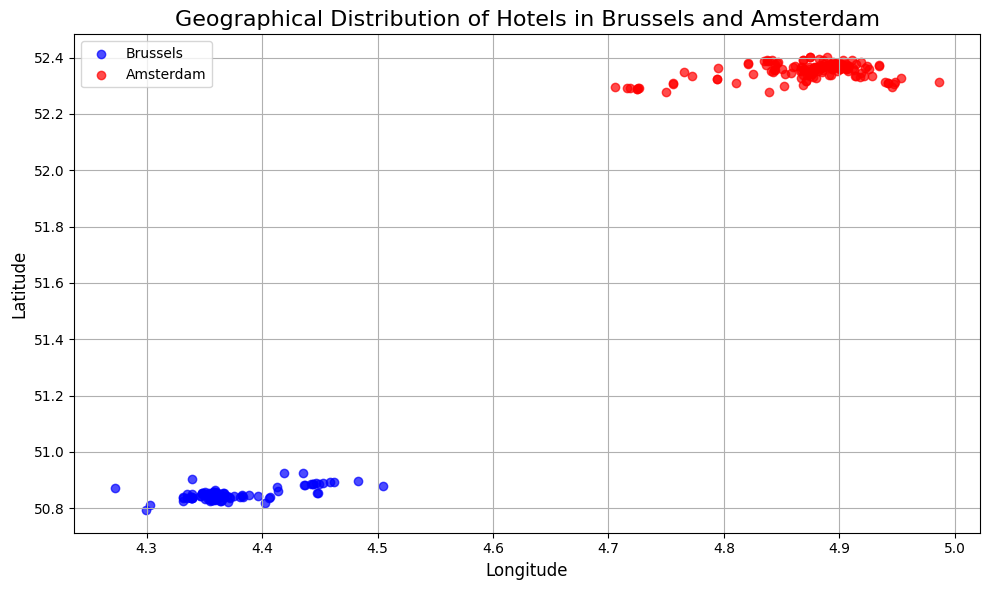

In [ ]:

# Assuming the 'hotels_information' DataFrame has the 'latitude', 'longitude', and 'city' columns

# Create a scatter plot with latitude and longitude, color-coded by city
plt.figure(figsize=(10, 6))

# Plot for Brussels (city = 'Brussels')
plt.scatter(hotels_information[hotels_information['city'] == 'Brussels']['longitude'],
            hotels_information[hotels_information['city'] == 'Brussels']['latitude'],
            color='blue', label='Brussels', alpha=0.7)

# Plot for Amsterdam (city = 'Amsterdam')
plt.scatter(hotels_information[hotels_information['city'] == 'Amsterdam']['longitude'],
            hotels_information[hotels_information['city'] == 'Amsterdam']['latitude'],
            color='red', label='Amsterdam', alpha=0.7)

# Add title and labels
plt.title('Geographical Distribution of Hotels in Brussels and Amsterdam', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

#  Add a legend
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

> 💡 The first plot shows the geographical distribution of hotels based on their latitude and longitude without distinguishing between cities. Hotels are grouped into two clusters, corresponding to different regions. The second plot improves upon this by categorizing hotels into two cities: Brussels (blue points) and Amsterdam (red points). The blue cluster in the lower left corresponds to hotels in Brussels, while the red cluster in the upper right represents hotels in Amsterdam. The identification of the cities based on GPS location was based on an online search.







***

## 4.5 Merging of datasets and correlations of key variables

### 4.5.1 Merging the dataset hotels_information and booking_data into one dataset 'merged_data'

ℹ The script merges the hotels_information and booking_data datasets based on the common column our_hotel_id, using a left join to retain all rows from hotels_information and add matching rows from booking_data. Before merging, the review_score column is dropped from hotels_information to avoid duplication.

In [ ]:
# Perform the merge on 'our_hotel_id'
merged_data = pd.merge(hotels_information, booking_data, on='our_hotel_id', how='left')

In [ ]:
display (merged_data)

our_hotel_id                              name  review_score  stars  \
0           3169410      Hotel Indigo Brussels - City           8.4    4.0   
1           3169410      Hotel Indigo Brussels - City           8.4    4.0   
2           3169410      Hotel Indigo Brussels - City           8.4    4.0   
3           3169410      Hotel Indigo Brussels - City           8.4    4.0   
4           3169410      Hotel Indigo Brussels - City           8.4    4.0   
...             ...                               ...           ...    ...   
25375       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   
25376       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   
25377       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   
25378       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   
25379       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   

        latitude  longitude  room_count      city arrival_date  lead_time  \
0      50.855711   4.359679       283.0  Brussels   2021-01-23          1   
1      50.855711   4.359679       283.0  Brussels   2021-01-24          2   
2      50.855711   4.359679       283.0  Brussels   2021-01-25          3   
3      50.855711   4.359679       283.0  Brussels   2021-01-26          4   
4      50.855711   4.359679       283.0  Brussels   2021-01-27          5   
...          ...        ...         ...       ...          ...        ...   
25375  50.846179   4.354423        22.0  Brussels   2021-04-18         86   
25376  50.846179   4.354423        22.0  Brussels   2021-04-19         87   
25377  50.846179   4.354423        22.0  Brussels   2021-04-20         88   
25378  50.846179   4.354423        22.0  Brussels   2021-04-21         89   
25379  50.846179   4.354423        22.0  Brussels   2021-04-22         90   

           room_name meal_type_included  max_persons  price_value_ref  \
0      Standard Room               NONE          2.0              NaN   
1      Standard Room               NONE          2.0              NaN   
2      Standard Room               NONE          2.0              NaN   
3      Standard Room               NONE          2.0              NaN   
4      Standard Room               NONE          2.0            133.0   
...              ...                ...          ...              ...   
25375      Twin Room               NONE          2.0             83.0   
25376      Twin Room               NONE          2.0             83.0   
25377      Twin Room               NONE          2.0             83.0   
25378      Twin Room               NONE          2.0             83.0   
25379      Twin Room               NONE          2.0             83.0   

       price_value_non_ref  is_sold_out  missing_count room_category  
0                    87.55        False              1      Standard  
1                    87.55        False              1      Standard  
2                   113.05        False              1      Standard  
3                   113.05        False              1      Standard  
4                   113.05        False              0      Standard  
...                    ...          ...            ...           ...  
25375                58.00        False              0          Twin  
25376                58.00        False              0          Twin  
25377                58.00        False              0          Twin  
25378                58.00        False              0          Twin  
25379                58.00        False              0          Twin  

[25380 rows x 18 columns]

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25380 entries, 0 to 25379
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   our_hotel_id         25380 non-null  int64   
 1   name                 25380 non-null  object  
 2   review_score         24480 non-null  float64 
 3   stars                25380 non-null  float64 
 4   latitude             25380 non-null  float64 
 5   longitude            25380 non-null  float64 
 6   room_count           25380 non-null  float64 
 7   city                 25380 non-null  object  
 8   arrival_date         25380 non-null  object  
 9   lead_time            25380 non-null  int64   
 10  room_name            22756 non-null  category
 11  meal_type_included   22756 non-null  category
 12  max_persons          22756 non-null  float64 
 13  price_value_ref      22597 non-null  float64 
 14  price_value_non_ref  22756 non-null  float64 
 15  is_sold_out        

> 💡 The merged dataset contains 25,380 rows and 18 columns, combining hotels_information and booking_data. Key columns like our_hotel_id, name, stars, latitude, longitude, room_count, and city are complete, while others, such as review_score, room_name, and price_value_ref, have missing values that may need addressing. The dataset includes diverse data types, including integers, floats, strings, categories, and a boolean column, and uses approximately 3.0 MB of memory. This successful merge retains all rows from hotels_information while incorporating booking details for further analysis.

### 4.5.2 Merged Dataset: Correlation Between Room Count, Stars, Review Scores, Room Categories, and Pricing

ℹ This script analyzes the relationships between key variables in the merged dataset, including room count, hotel stars, review scores, room category, and pricing (both refundable and non-refundable prices). It begins by ensuring all necessary columns are present in the dataset. It calculates the frequency of each room category per hotel and integrates this information back into the dataset. The script then encodes the room categories into numerical values for correlation analysis. It selects relevant variables, such as the number of rooms, star ratings, review scores, room category frequency, and pricing, and filters out rows with missing data. A correlation matrix is calculated to assess the strength and direction of relationships between these variables. Finally, the script visualizes the correlation matrix using a heatmap, highlighting potential patterns such as the correlation between hotel stars and pricing or between room count and review scores, providing insights into the dataset's structur

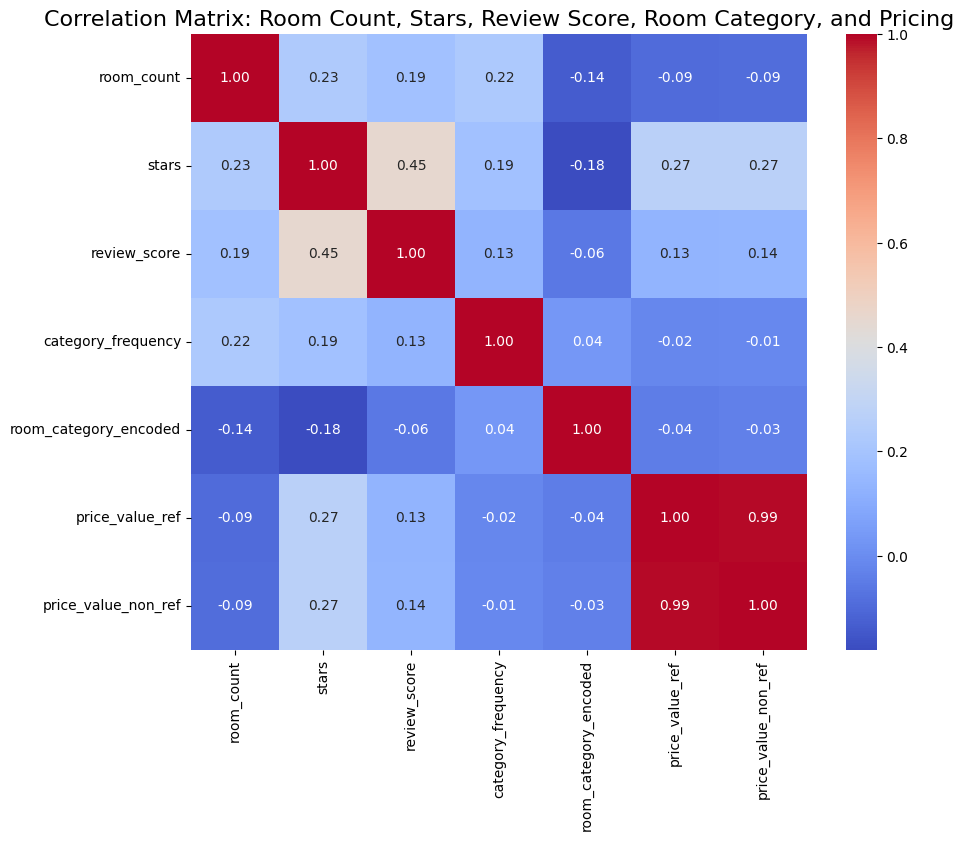

In [ ]:
# Ensure the necessary columns exist in the dataset
required_columns = {
    'our_hotel_id', 'stars', 'room_category', 'room_count',
    'review_score', 'price_value_ref', 'price_value_non_ref'
}
if required_columns.issubset(merged_data.columns):
    # Group data to calculate the frequency of each room category per hotel
    room_category_frequency = merged_data.groupby(['our_hotel_id', 'room_category']).size().reset_index(name='category_frequency')

    # Merge the frequency data back into the original dataset
    merged_data_with_frequency = pd.merge(merged_data, room_category_frequency, on=['our_hotel_id', 'room_category'], how='left')

    # Encode room_category into numerical values
    merged_data_with_frequency['room_category_encoded'] = merged_data_with_frequency['room_category'].astype('category').cat.codes

    # Select variables for correlation analysis, including pricing
    correlation_variables = [
        'room_count',  # Total number of rooms
        'stars',       # Hotel rating
        'review_score', # Average review score
        'category_frequency',  # Frequency of room category
        'room_category_encoded',  # Encoded room category
        'price_value_ref',       # Price for refundable rooms
        'price_value_non_ref'    # Price for non-refundable rooms
    ]

    # Drop rows with missing values in the selected variables
    correlation_data = merged_data_with_frequency[correlation_variables].dropna()

    # Calculate the correlation matrix
    correlation_matrix = correlation_data.corr()

    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Correlation Matrix: Room Count, Stars, Review Score, Room Category, and Pricing', fontsize=16)
    plt.show()

else:
    print(f"The dataset is missing one or more of the required columns: {required_columns}")


> 💡 The correlation matrix provides preliminary insights to identify key relationships among variables worth further exploration. Most variables show weak correlations with each other. The strong correlation between refundable and non-refundable prices (0.99) was expected, reflecting consistent pricing strategies. Additionally, the matrix highlights a moderate correlation between stars and reviews (0.45), indicating an interconnection between hotel ratings and customer satisfaction.

***

# 5. COMPARATIVE DATA-ANALYSIS


5.1 Exploring Correlations and Clustering in Hotel Data ### 5.1 Correlations and clustering in hotel data: Stars, Review Scores, and Prices



> ℹ The script analyzes relationships and patterns in hotel data, focusing on correlations and clustering. First, it calculates and visualizes correlations between hotel stars, review_score, and average_price using scatter plots with regression lines, highlighting the strength of these relationships. Next, it normalizes stars and review_score to create a combined_score and prepares data for clustering. Using the K-Means algorithm, the code determines the optimal number of clusters with the elbow method (based on WCSS) and performs clustering for combinations of stars, review_score, combined_score, and average_price. Finally, it visualizes these clusters across different variable combinations, providing insights into patterns and groupings within the datase

In [ ]:
# Check correlation between review_score and stars
correlation = hotels_information[['review_score', 'stars']].corr()
print("Correlation between review_score and stars:")
print(correlation)


Correlation between review_score and stars:
              review_score     stars
review_score      1.000000  0.451369
stars             0.451369  1.000000


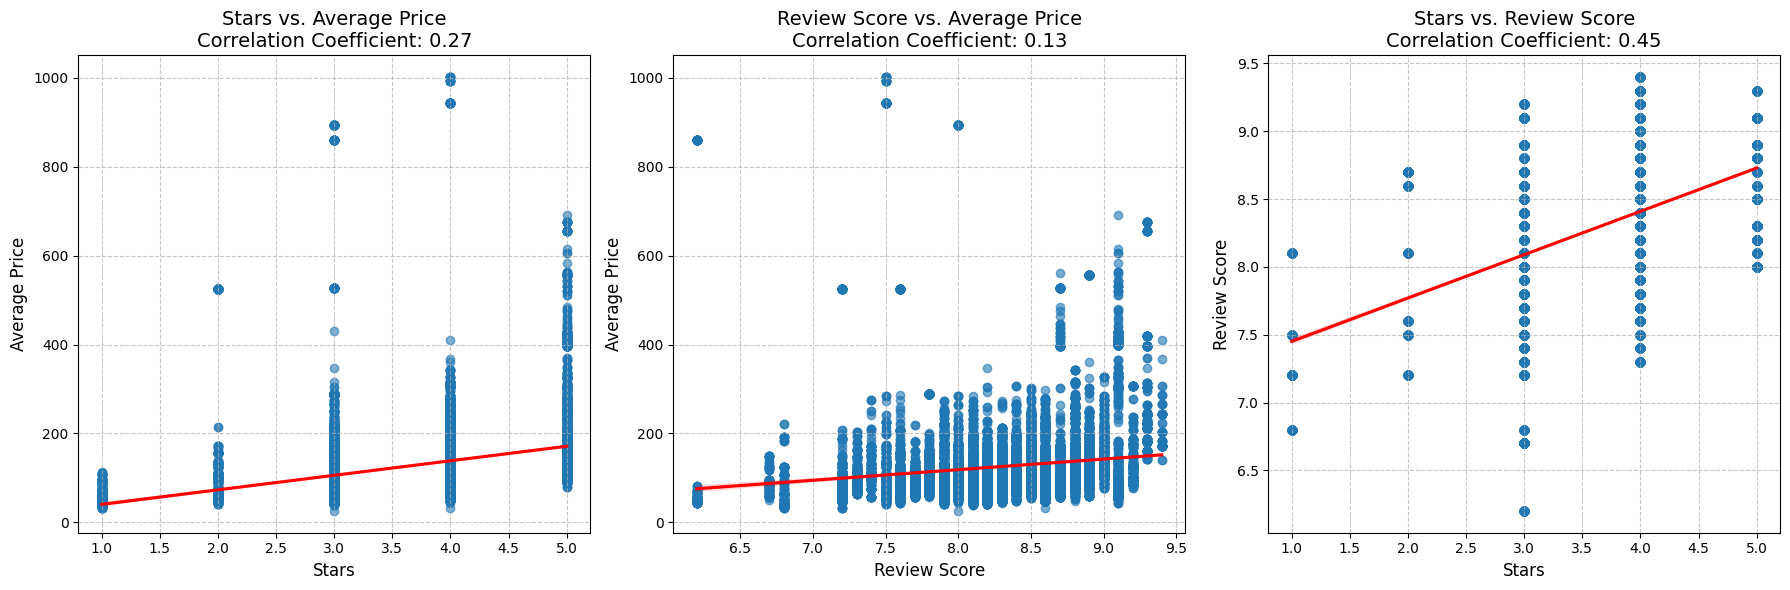

In [ ]:

# Calculate the average price
merged_data['average_price'] = merged_data[['price_value_ref', 'price_value_non_ref']].mean(axis=1)
# Ensure the necessary columns exist
if all(col in merged_data.columns for col in ['stars', 'review_score', 'average_price']):
    # Calculate correlation coefficients
    corr_stars_price = merged_data['stars'].corr(merged_data['average_price'])
    corr_review_price = merged_data['review_score'].corr(merged_data['average_price'])
    corr_stars_review = merged_data['stars'].corr(merged_data['review_score'])

    # Create subplots
    plt.figure(figsize=(18, 6))

    # Correlation between Stars and Average Price
    plt.subplot(1, 3, 1)
    sns.regplot(x='stars', y='average_price', data=merged_data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    plt.title(f"Stars vs. Average Price\nCorrelation Coefficient: {corr_stars_price:.2f}", fontsize=14)
    plt.xlabel("Stars", fontsize=12)
    plt.ylabel("Average Price", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Correlation between Review Score and Average Price
    plt.subplot(1, 3, 2)
    sns.regplot(x='review_score', y='average_price', data=merged_data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    plt.title(f"Review Score vs. Average Price\nCorrelation Coefficient: {corr_review_price:.2f}", fontsize=14)
    plt.xlabel("Review Score", fontsize=12)
    plt.ylabel("Average Price", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Correlation between Stars and Review Score
    plt.subplot(1, 3, 3)
    sns.regplot(x='stars', y='review_score', data=merged_data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    plt.title(f"Stars vs. Review Score\nCorrelation Coefficient: {corr_stars_review:.2f}", fontsize=14)
    plt.xlabel("Stars", fontsize=12)
    plt.ylabel("Review Score", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()
else:
    print("Required columns ('stars', 'review_score', 'average_price') do not exist in the dataset.")


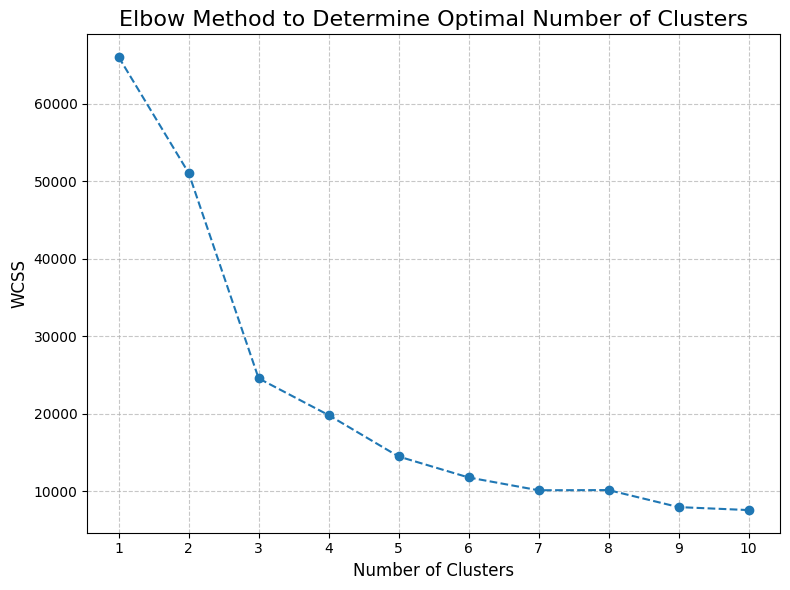

In [ ]:
# Ensure necessary columns exist and create the combined score
merged_data['stars_normalized'] = (merged_data['stars'] - merged_data['stars'].min()) / (merged_data['stars'].max() - merged_data['stars'].min())
merged_data['review_score_normalized'] = (merged_data['review_score'] - merged_data['review_score'].min()) / (merged_data['review_score'].max() - merged_data['review_score'].min())
merged_data['combined_score'] = 0.5 * merged_data['stars_normalized'] + 0.5 * merged_data['review_score_normalized']

# Prepare data for clustering
clustering_data = merged_data[['average_price', 'stars', 'combined_score']].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_data)

# alculate WCSS for different numbers of clusters
wcss = []
max_clusters = 10  # You can adjust this value

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph with more x-axis ticks
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)

# Adding more ticks on the x-axis
plt.xticks(range(1, max_clusters + 1))  # Ensures ticks are placed for each cluster number

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


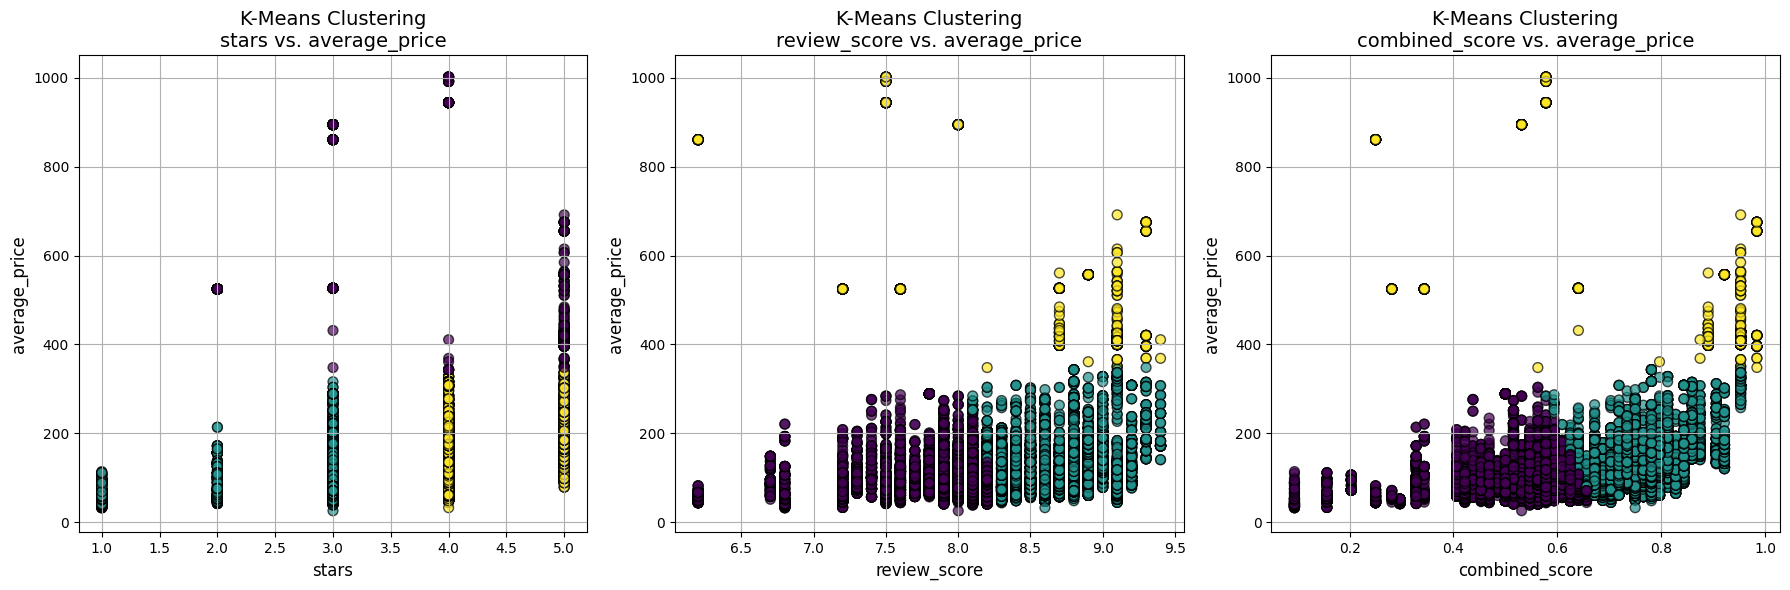

In [ ]:

# Ensure necessary columns exist
if all(col in merged_data.columns for col in ['stars', 'review_score', 'average_price']):
    # Step 1: Create the combined score
    merged_data['stars_normalized'] = (merged_data['stars'] - merged_data['stars'].min()) / (merged_data['stars'].max() - merged_data['stars'].min())
    merged_data['review_score_normalized'] = (merged_data['review_score'] - merged_data['review_score'].min()) / (merged_data['review_score'].max() - merged_data['review_score'].min())
    merged_data['combined_score'] = 0.5 * merged_data['stars_normalized'] + 0.5 * merged_data['review_score_normalized']

    # Ensure 'stars' is an integer
    merged_data['stars'] = merged_data['stars'].round().astype(int)

    # Step 2: Prepare data for clustering
    combinations = [
        ('stars', 'average_price'),
        ('review_score', 'average_price'),
        ('combined_score', 'average_price')
    ]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for idx, (x_col, y_col) in enumerate(combinations):
        # Drop missing values for the selected columns
        clustering_data = merged_data[[x_col, y_col]].dropna()

        # Standardize the features
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(clustering_data)

        # Perform KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=42)
        clustering_data['cluster'] = kmeans.fit_predict(scaled_features)

        # Plot the clusters
        axes[idx].scatter(
            clustering_data[x_col],
            clustering_data[y_col],
            c=clustering_data['cluster'],
            cmap='viridis',
            s=50,
            alpha=0.7,
            edgecolor='k'
        )
        axes[idx].set_title(f"K-Means Clustering\n{x_col} vs. {y_col}", fontsize=14)
        axes[idx].set_xlabel(x_col, fontsize=12)
        axes[idx].set_ylabel(y_col, fontsize=12)
        axes[idx].grid(True)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()
else:
    print("Required columns ('stars', 'review_score', 'average_price') do not exist in the dataset.")


> 💡 The analysis explores the relationships between star ratings, review scores, and average price of hotels. The scatterplots reveal a low correlation between stars and average price (0.27) and between review scores and average price (0.13), suggesting that these variables are not strong predictors of price. However, there is a moderate positive correlation (0.45) between stars and review scores, indicating a potential combined influence on hotel quality. To investigate this further, a combined score was created by normalizing and averaging star ratings and review scores. Using the elbow method for K-Means clustering, three clusters were identified: two clusters separated hotels into lower and higher quality, but a third cluster comprised only of high-priced hotels across all quality levels. This irregular clustering makes the results less applicable for further meaningful segmentation or predictive analysis, as the clusters fail to clearly define consistent or actionable groupings.








***

## 5.2 City-wise nalysis of hotel stars and review scores

> ℹ This script analyzes and visualizes the distribution of hotels in Amsterdam and Brussels based on star ratings and review scores. It starts by preparing the data, ensuring necessary columns are present, and converts missing star values to integers. Review scores are categorized into five labeled bins ("Very Low" to "Very High") to simplify analysis. Cross-tabulations are created to calculate the counts and percentages of hotels for both cities across star ratings and binned review scores. The script then generates four stacked bar plots: absolute and percentage distributions by star ratings and by review scores. These plots visually compare the total and relative proportions of hotels across categories for each city, highlighting patterns in the dataset.









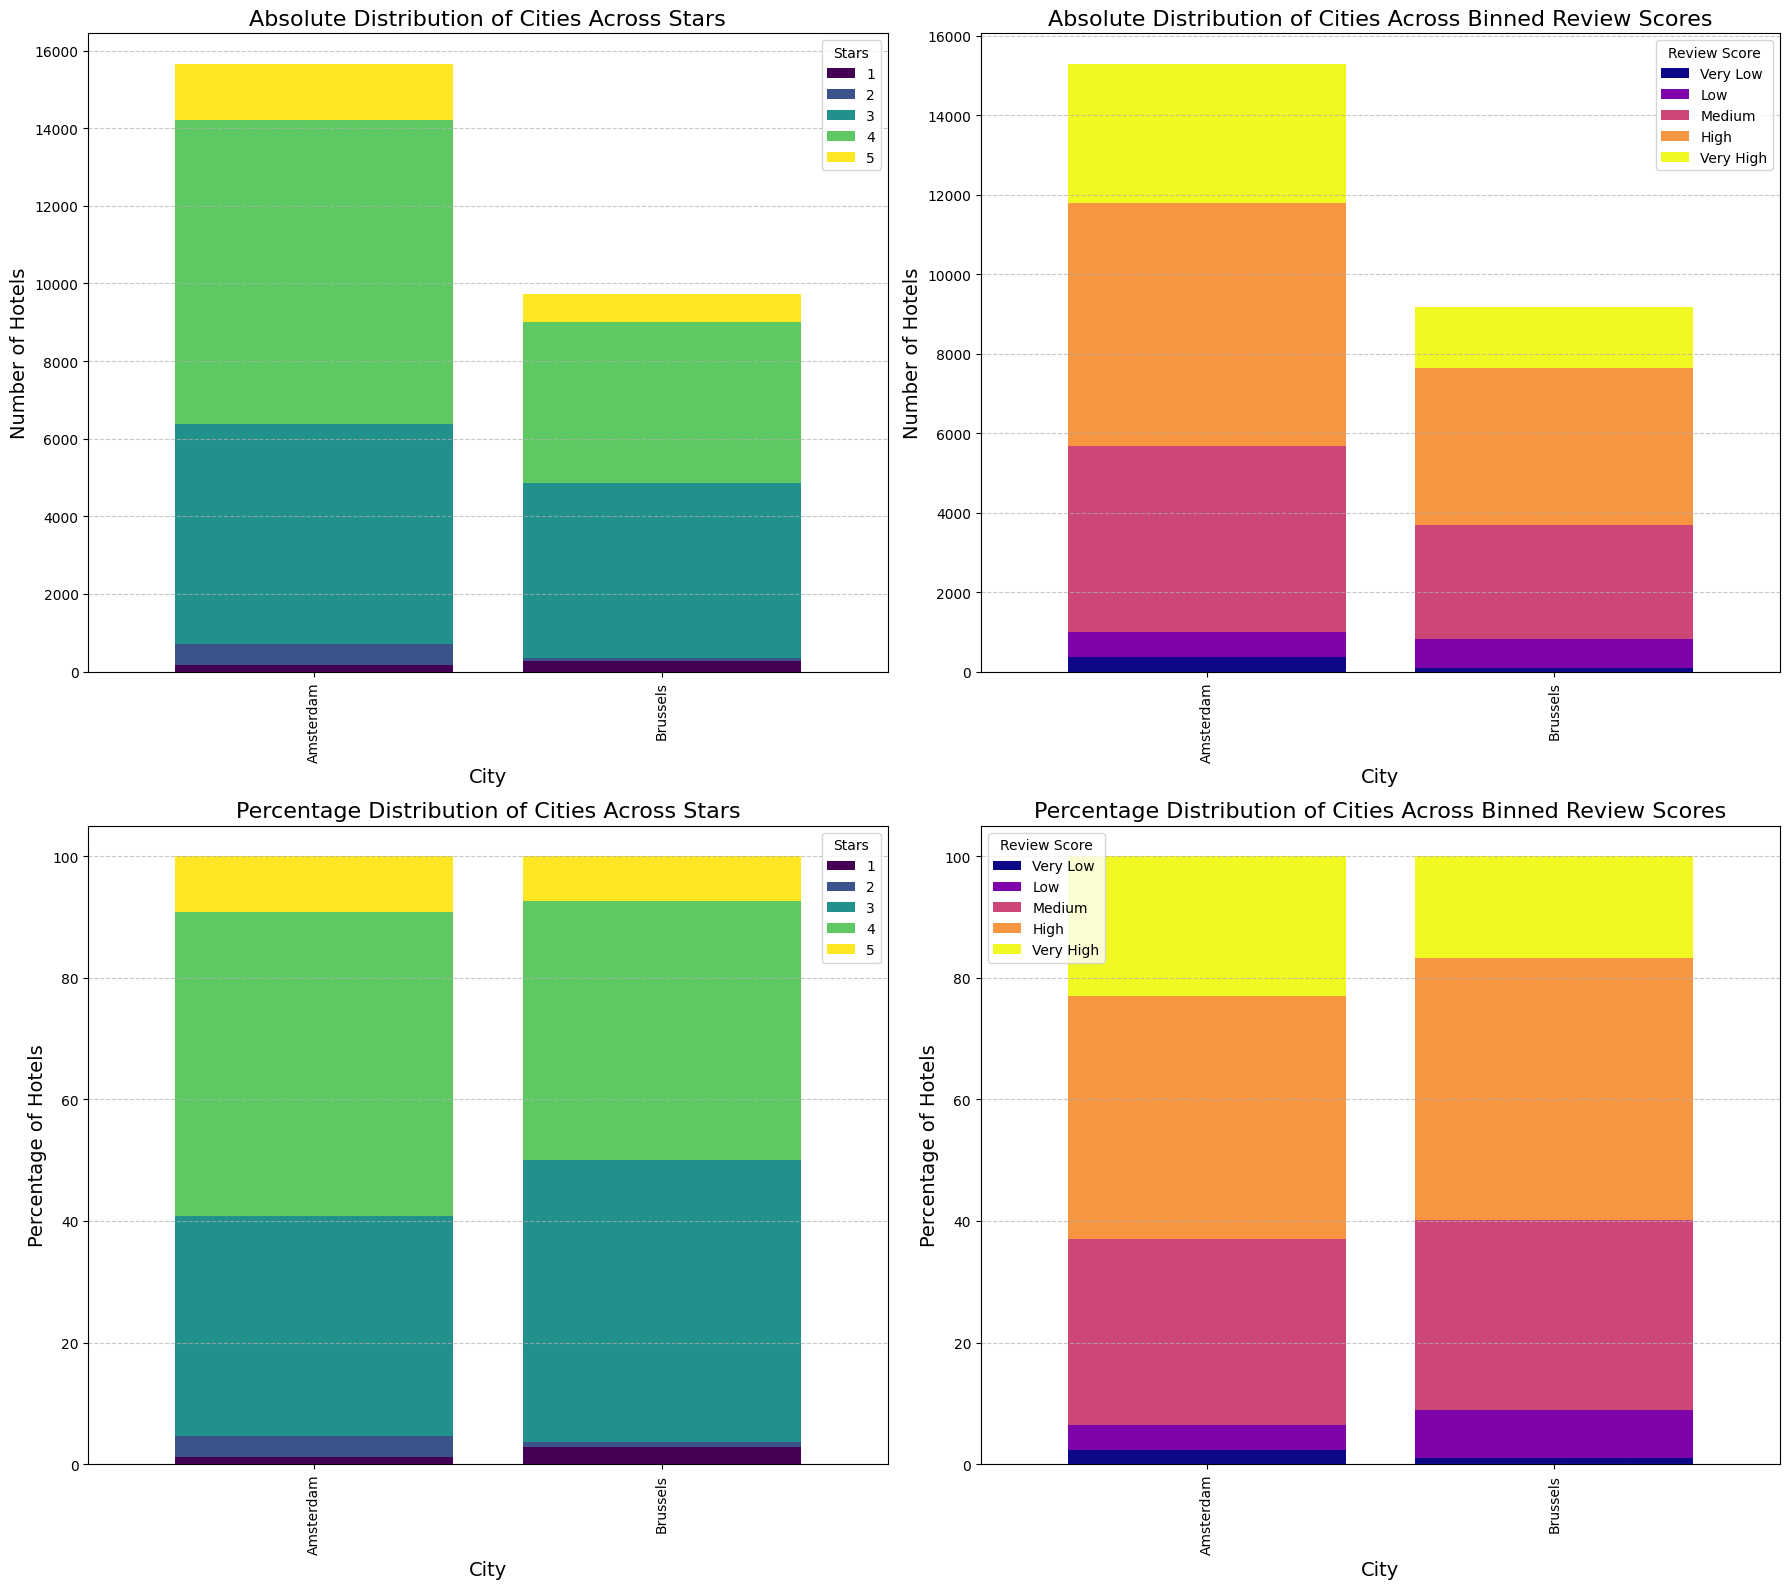

In [ ]:
# Step 1: Create a copy for manipulation
merged_data_with_clusters = merged_data.copy()

# Ensure the necessary columns exist
if 'stars' in merged_data_with_clusters.columns and 'review_score' in merged_data_with_clusters.columns:
    # Step 2: Ensure stars are integers
    merged_data_with_clusters['stars'] = merged_data_with_clusters['stars'].fillna(0).astype(int)

    # Step 3: Bin the review scores into 5 equal-width categories with descriptive labels
    review_min = merged_data_with_clusters['review_score'].min()
    review_max = merged_data_with_clusters['review_score'].max()
    bin_edges = np.linspace(review_min, review_max, 6)  # Create 5 equal-width bins
    bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']  # Descriptive labels for bins
    merged_data_with_clusters['review_score_binned'] = pd.cut(
        merged_data_with_clusters['review_score'],
        bins=bin_edges,
        labels=bin_labels,
        include_lowest=True
    )

    # Step 4: Create cross-tabulations for city distribution by stars and binned review scores
    city_stars_distribution = pd.crosstab(merged_data_with_clusters['city'], merged_data_with_clusters['stars'])
    city_review_distribution = pd.crosstab(merged_data_with_clusters['city'], merged_data_with_clusters['review_score_binned'])

    # Convert counts to percentages for percentage stacked plots
    city_stars_percentage = city_stars_distribution.div(city_stars_distribution.sum(axis=1), axis=0) * 100
    city_review_percentage = city_review_distribution.div(city_review_distribution.sum(axis=1), axis=0) * 100

    # Step 5: Plot the distributions
    fig, axes = plt.subplots(2, 2, figsize=(18, 16))  # Create a 2x2 subplot layout

    # Subplot 1: Absolute distribution by stars
    city_stars_distribution.plot(
        kind='bar',
        stacked=True,
        colormap='viridis',
        width=0.8,
        ax=axes[0, 0]
    )
    axes[0, 0].set_title('Absolute Distribution of Cities Across Stars', fontsize=16)
    axes[0, 0].set_xlabel('City', fontsize=14)
    axes[0, 0].set_ylabel('Number of Hotels', fontsize=14)
    axes[0, 0].legend(title='Stars', fontsize=10)
    axes[0, 0].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Subplot 2: Absolute distribution by binned review scores
    city_review_distribution.plot(
        kind='bar',
        stacked=True,
        colormap='plasma',
        width=0.8,
        ax=axes[0, 1]
    )
    axes[0, 1].set_title('Absolute Distribution of Cities Across Binned Review Scores', fontsize=16)
    axes[0, 1].set_xlabel('City', fontsize=14)
    axes[0, 1].set_ylabel('Number of Hotels', fontsize=14)
    axes[0, 1].legend(title='Review Score', fontsize=10)
    axes[0, 1].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Subplot 3: Percentage distribution by stars
    city_stars_percentage.plot(
        kind='bar',
        stacked=True,
        colormap='viridis',
        width=0.8,
        ax=axes[1, 0]
    )
    axes[1, 0].set_title('Percentage Distribution of Cities Across Stars', fontsize=16)
    axes[1, 0].set_xlabel('City', fontsize=14)
    axes[1, 0].set_ylabel('Percentage of Hotels', fontsize=14)
    axes[1, 0].legend(title='Stars', fontsize=10)
    axes[1, 0].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Subplot 4: Percentage distribution by binned review scores
    city_review_percentage.plot(
        kind='bar',
        stacked=True,
        colormap='plasma',
        width=0.8,
        ax=axes[1, 1]
    )
    axes[1, 1].set_title('Percentage Distribution of Cities Across Binned Review Scores', fontsize=16)
    axes[1, 1].set_xlabel('City', fontsize=14)
    axes[1, 1].set_ylabel('Percentage of Hotels', fontsize=14)
    axes[1, 1].legend(title='Review Score', fontsize=10)
    axes[1, 1].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Optimize layout and display the plots
    plt.tight_layout()  # Prevents label overlap
    plt.show()

else:
    print("The 'stars' or 'review_score' column is missing. Please ensure these columns exist in the dataset.")


> 💡 The plots indicate that Amsterdam has a significantly larger number of hotels compared to Brussels, with a broader distribution across both star categories and review scores. Amsterdam displays a relatively balanced spread, with 3-star and 4-star hotels dominating and a notable presence of 5-star hotels, reflecting its ability to cater to diverse customer segments. In contrast, Brussels has fewer hotels overall and a more concentrated distribution, primarily in the 3-star category, indicating a focus on budget-conscious or practical travelers. Despite differences in hotel numbers, both cities show a similar relative distribution across star ratings and review scores. Notably, Amsterdam has a slightly larger proportion of hotels in the "Very High" review score category, suggesting a strong customer experience.  The relatively fewer hotels in the lower categories, such as 1-star, 2-star, "Very Low," and "Low" ratings, suggest that both Amsterdam and Brussels prioritize quality and customer satisfaction in their hospitality offering.

***

## 5.3 Hotel sold-Out Status and arrival date trends






> ℹ This script visualizes hotel booking data, showing sold-out statuses on both daily and monthly scales. It filters the dataset for the date range between January 23, 2021, and April 22, 2021. The first plot displays daily sold-out counts, while the second shows monthly percentages of hotels sold out. Both plots use color-coded stacked bars, with proper labels, legends, and grid lines for clarity. The monthly plot normalizes data to percentages for better comparison.








In [ ]:
print(f"Earliest date in the dataset: {merged_data['arrival_date'].min()}")
print(f"Latest date in the dataset: {merged_data['arrival_date'].max()}")

Earliest date in the dataset: 2021-01-23
Latest date in the dataset: 2021-04-22


In [ ]:
unique_values_count = merged_data['arrival_date'].nunique()
print(f"Number of unique values in 'arrival_date': {unique_values_count}")

Number of unique values in 'arrival_date': 90


In [ ]:
# Ensure the 'arrival_date' and 'our_hotel_id' columns exist
if 'arrival_date' in merged_data.columns and 'our_hotel_id' in merged_data.columns:
    # Convert arrival_date to datetime if not already
    merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'])

    # Filter the dataset to the relevant date range
    filtered_data = merged_data[
        (merged_data['arrival_date'] >= "2021-01-23") &
        (merged_data['arrival_date'] <= "2021-04-22")
    ]

    # Group by arrival_date and count unique our_hotel_id
    unique_hotel_counts = filtered_data.groupby('arrival_date')['our_hotel_id'].nunique()

    # Display the result
    print(unique_hotel_counts)
else:
    print("The necessary columns ('arrival_date', 'our_hotel_id') do not exist in the dataset.")


arrival_date
2021-01-23    282
2021-01-24    282
2021-01-25    282
2021-01-26    282
2021-01-27    282
             ... 
2021-04-18    282
2021-04-19    282
2021-04-20    282
2021-04-21    282
2021-04-22    282
Name: our_hotel_id, Length: 90, dtype: int64


<Figure size 1400x800 with 0 Axes>

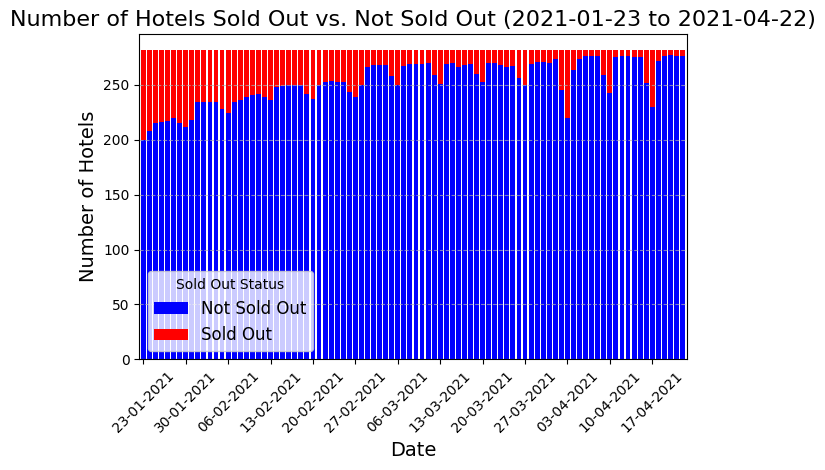

<Figure size 1000x600 with 0 Axes>

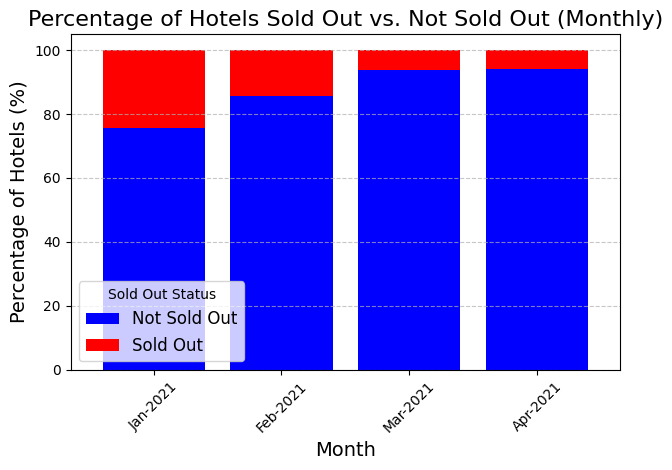

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the necessary columns exist
if 'is_sold_out' in merged_data.columns and 'arrival_date' in merged_data.columns:
    # Convert arrival_date to datetime if not already
    merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'])

    # Filter the dataset to the relevant date range
    filtered_data = merged_data[
        (merged_data['arrival_date'] >= "2021-01-23") &
        (merged_data['arrival_date'] <= "2021-04-22")
    ]

    # 2. Daily Count of Sold Out Hotels (Displayed First)
    sold_out_data = filtered_data.groupby(['arrival_date', 'is_sold_out']).size().unstack(fill_value=0)

    # Plot the daily stacked bar chart with custom colors
    plt.figure(figsize=(14, 8))
    sold_out_data.plot(
        kind='bar',
        stacked=True,
        color=['blue', 'red'],
        width=0.8
    )

    # Add title and labels
    plt.title('Number of Hotels Sold Out vs. Not Sold Out (2021-01-23 to 2021-04-22)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Hotels', fontsize=14)

    # Format x-axis for better readability
    plt.xticks(ticks=range(0, len(sold_out_data.index), 7), labels=sold_out_data.index[::7].strftime('%d-%m-%Y'), rotation=45)

    # Add legend and grid
    plt.legend(title='Sold Out Status', labels=['Not Sold Out', 'Sold Out'], fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

    # 1. Monthly Percentage of Sold Out Hotels (Displayed Last)
    filtered_data['month'] = filtered_data['arrival_date'].dt.to_period('M')
    monthly_sold_out_data = filtered_data.groupby(['month', 'is_sold_out']).size().unstack(fill_value=0)

    # Normalize the values to percentages
    monthly_percentage_sold_out_data = monthly_sold_out_data.div(monthly_sold_out_data.sum(axis=1), axis=0) * 100

    # Plot the monthly averages stacked bar chart with percentages
    plt.figure(figsize=(10, 6))
    monthly_percentage_sold_out_data.plot(
        kind='bar',
        stacked=True,
        color=['blue', 'red'],
        width=0.8
    )

    # Add title and labels
    plt.title('Percentage of Hotels Sold Out vs. Not Sold Out (Monthly)', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Percentage of Hotels (%)', fontsize=14)
    plt.xticks(ticks=range(len(monthly_percentage_sold_out_data.index)),
               labels=monthly_percentage_sold_out_data.index.strftime('%b-%Y'), rotation=45)

    # Add legend and grid
    plt.legend(title='Sold Out Status', labels=['Not Sold Out', 'Sold Out'], fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("The necessary columns ('is_sold_out', 'arrival_date') do not exist in the dataset.")


>💡 The bar charts display hotel sold-out statuses from January 23 to April 22, 2021. The first chart shows that most rooms were not sold out. Over time, sold-out rates decreased. The second chart, showing percentages, illustrates a steady decline in sold-out hotels, reaching its lowest point in April, with more than 90% of hotels unbooked. This suggests a decrease in occupancy over time, potentially due to seasonal factors, highlighting the need for strategies to improve hotel occupancy.























***

## 5.4 Hotel sold-out rates by star ratings and review scores across cities

> ℹ The script analyzes hotel sold-out rates by star ratings and review scores across cities, ensuring fair comparisons by normalizing sold-out counts as percentages (sold_out_hotels / total_hotels * 100). It groups the data by city and star ratings to calculate sold-out rates, and bins review scores into five categories to do the same. This normalization accounts for differences in group sizes, avoiding bias from raw counts. The results are visualized in two subplots: one for sold-out rates by star ratings and another for binned review scores, with bars shifted slightly for clarity across cities.








/var/folders/r1/7q7bk_397yxc5xp5rbsj60wm0000gn/T/ipykernel_79265/3536006687.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_data = merged_data.groupby(["city", "review_score_binned"]).agg(


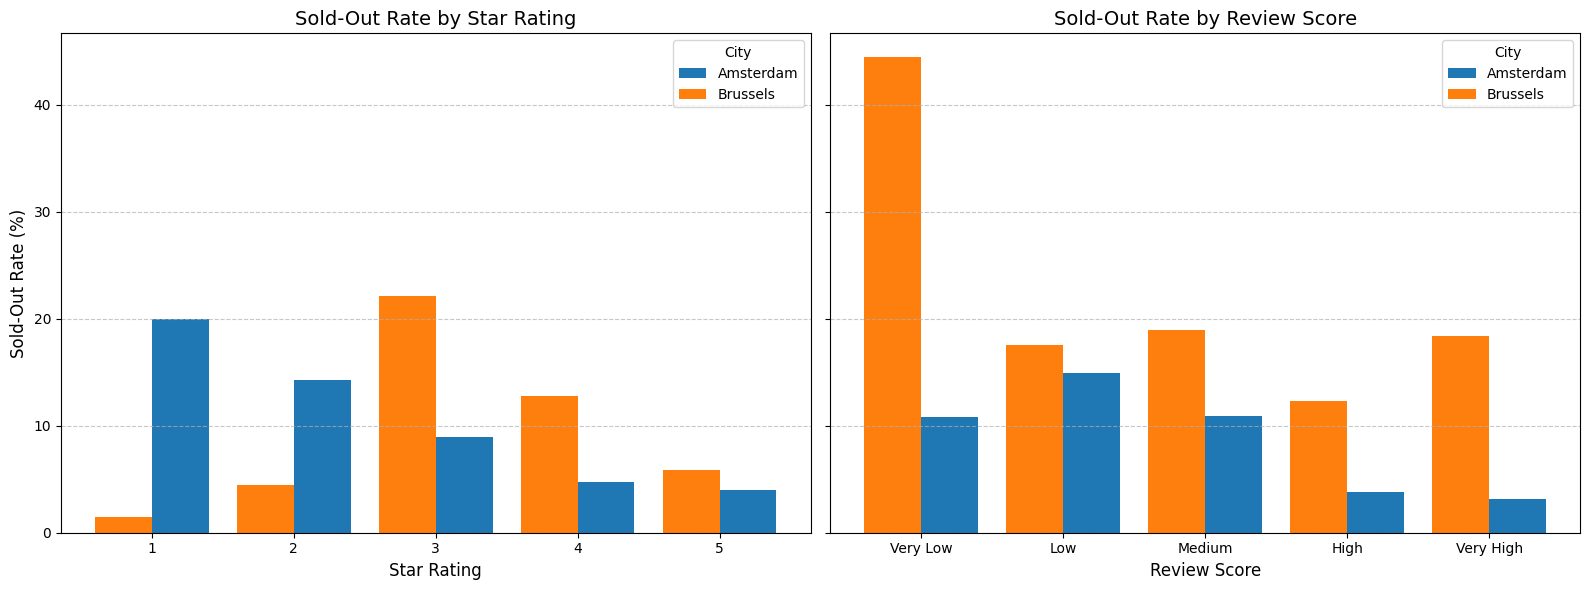

In [ ]:
# Ensure necessary columns exist in the dataset
if all(col in merged_data.columns for col in ["city", "stars", "is_sold_out", "review_score"]):
    # Group by city and star ratings to calculate total and sold-out hotels
    star_data = merged_data.groupby(["city", "stars"]).agg(
        total_hotels=("is_sold_out", "size"),
        sold_out_hotels=("is_sold_out", "sum")
    ).reset_index()

    # Calculate the sold-out rate for stars
    star_data["sold_out_rate"] = (star_data["sold_out_hotels"] / star_data["total_hotels"]) * 100

    # Bin the review scores into 5 categories
    merged_data['review_score_binned'] = pd.cut(
        merged_data['review_score'],
        bins=5,
        labels=["1", "2", "3", "4", "5"]
    )

    # Group by city and binned review scores to calculate total and sold-out hotels
    review_data = merged_data.groupby(["city", "review_score_binned"]).agg(
        total_hotels=("is_sold_out", "size"),
        sold_out_hotels=("is_sold_out", "sum")
    ).reset_index()

    # Calculate the sold-out rate for review scores
    review_data["sold_out_rate"] = (review_data["sold_out_hotels"] / review_data["total_hotels"]) * 100

    # Create the subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # Plot data for stars
    for city in star_data["city"].unique():
        city_data = star_data[star_data["city"] == city]
        axes[0].bar(
            city_data["stars"] + (0.2 if city == "Amsterdam" else -0.2),  # Shift bars for distinction
            city_data["sold_out_rate"],
            width=0.4,
            label=city
        )
    axes[0].set_title("Sold-Out Rate by Star Rating", fontsize=14)
    axes[0].set_xlabel("Star Rating", fontsize=12)
    axes[0].set_ylabel("Sold-Out Rate (%)", fontsize=12)
    axes[0].set_xticks(star_data["stars"].unique())
    axes[0].set_xticklabels(star_data["stars"].unique())
    axes[0].legend(title="City")
    axes[0].grid(axis="y", linestyle="--", alpha=0.7)

    # Plot data for review scores
    for city in review_data["city"].unique():
        city_data = review_data[review_data["city"] == city]
        axes[1].bar(
            city_data["review_score_binned"].astype(float) + (0.2 if city == "Amsterdam" else -0.2),  # Shift bars for distinction
            city_data["sold_out_rate"],
            width=0.4,
            label=city
        )
    axes[1].set_title("Sold-Out Rate by Review Score", fontsize=14)
    axes[1].set_xlabel("Review Score", fontsize=12)
    axes[1].set_xticks(range(1, 6))  # Review scores binned from 1 to 5
    axes[1].set_xticklabels(["Very Low", "Low", "Medium", "High", "Very High"])  # Custom labels
    axes[1].legend(title="City")
    axes[1].grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()


> 💡 The visualizations compare the sold-out rates of hotels by star ratings and review scores across Amsterdam and Brussels. In the left plot, for Amsterdam, 1-star hotels have the highest sold-out rate at around 20%, while the sold-out rate steadily decreases as star ratings increase, with 5-star hotels having the lowest sold-out rate. In contrast, Brussels shows the highest sold-out rate for 3-star hotels, while lower and higher star ratings (1-star and 5-star) exhibit comparatively lower sold-out rates. The right plot shows that hotels in Brussels have the highest sold-out rate for review scores in the lowest category (1), while Amsterdam’s sold-out rates are more evenly distributed across all review score bins, with no significant spike in any particular category. The high sold-out rate for hotels in Brussels with very low review scores, despite 1-star hotels not being highly booked, needs further research. TThese lower-rated hotels might be preferred due to advantages like prime locations near business or tourist areas, flexible booking policies, or catering to niche markets such as group bookings or last-minute travelers. They may also be misclassified, with low review scores not reflecting benefits like proximity to transport hubs or event venues.








***

## 5.5 Monthly trends in hotel sold-out rates by star ratings and review scores across cities



> ℹ This script analyzes and visualizes hotel sold-out rate trends over time, grouped by star ratings and review scores, across different cities. It first ensures the dataset contains the required columns, then converts arrival_date to a datetime format and extracts monthly periods for grouping. Review scores are categorized into five bins ('Very Low' to 'Very High'). The data is grouped by city, month, and star ratings or review score bins to calculate total hotels, sold-out hotels, and the sold-out rate as a percentage. Separate subplots are generated for each city, showing how sold-out rates vary by star ratings and review scores over time, providing insights into seasonal patterns and performance differences based on these factors.









/var/folders/r1/7q7bk_397yxc5xp5rbsj60wm0000gn/T/ipykernel_79265/2771287044.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_data_time = merged_data.groupby(["city", "month", "review_score_binned"]).agg(


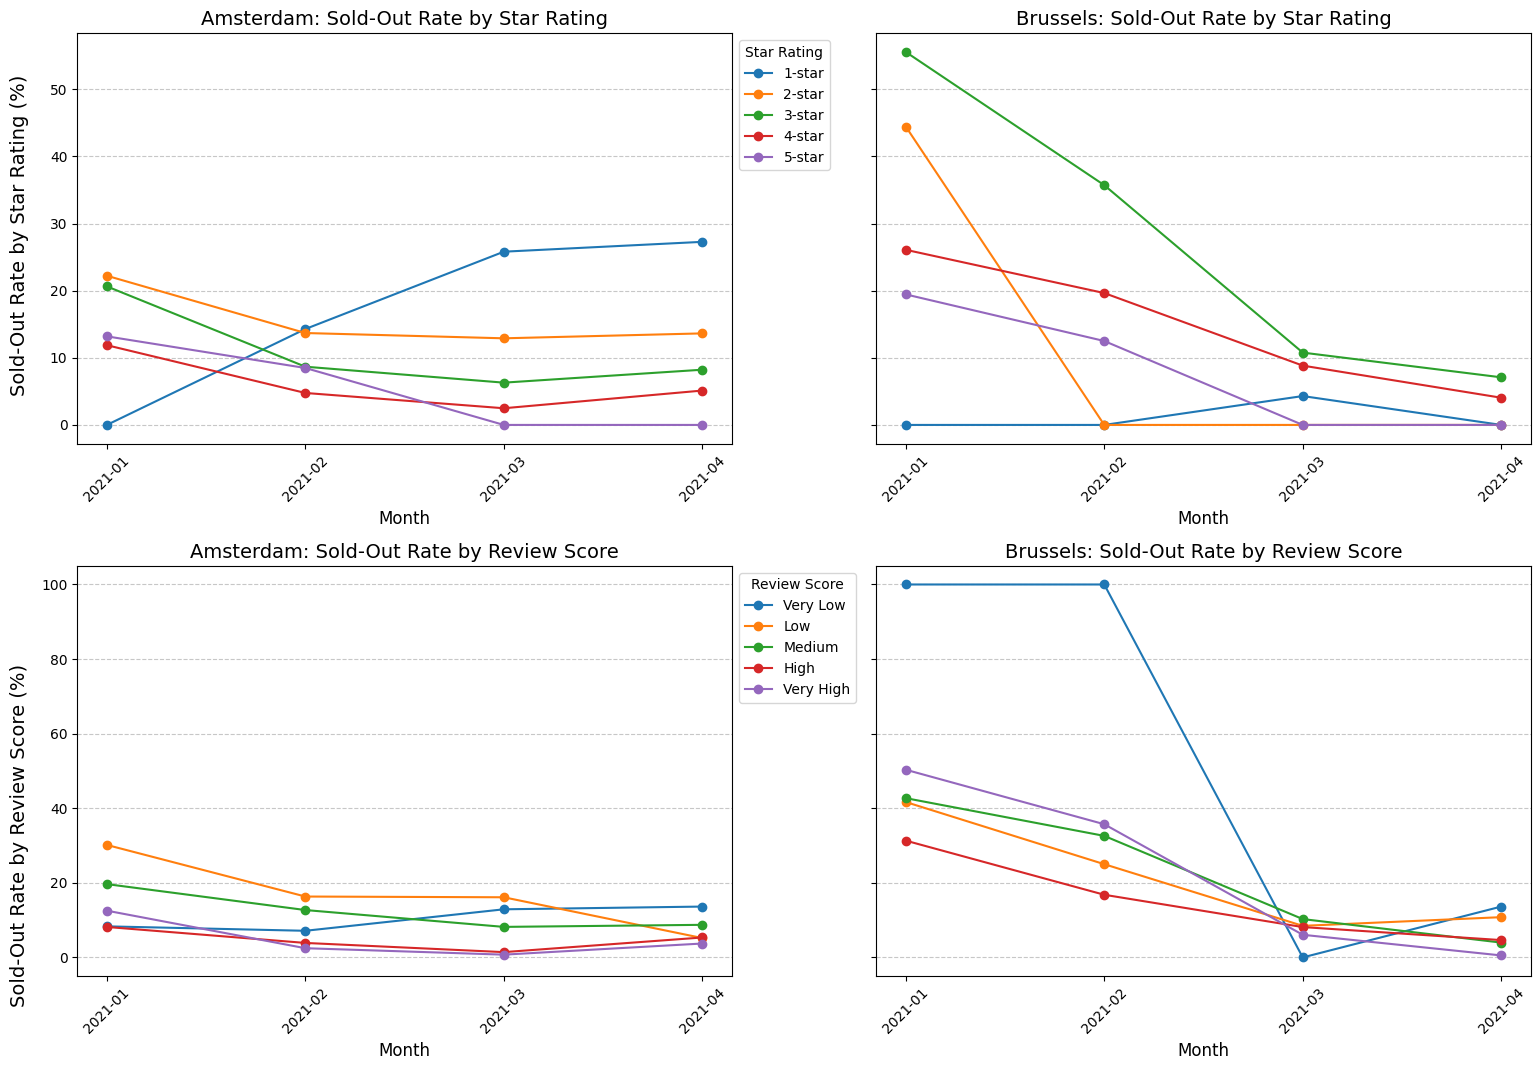

In [ ]:
# Ensure necessary columns exist
if all(col in merged_data.columns for col in ["city", "stars", "is_sold_out", "arrival_date", "review_score"]):
    # Convert 'arrival_date' to datetime format if not already
    merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'])

    # Extract the month from the arrival date for grouping
    merged_data['month'] = merged_data['arrival_date'].dt.to_period('M')

    # Determine the range of review scores and create equal-width bins
    num_bins = 5  # Number of equal intervals
    review_min, review_max = merged_data['review_score'].min(), merged_data['review_score'].max()
    bin_edges = np.linspace(review_min, review_max, num_bins + 1)  # Equal-width bins
    bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']  # Corresponding labels

    # Bin the review scores into equal-width intervals with labels
    merged_data['review_score_binned'] = pd.cut(
        merged_data['review_score'],
        bins=bin_edges,
        labels=bin_labels,
        include_lowest=True
    )

    # Group by city, month, and star ratings to calculate total and sold-out hotels
    star_data_time = merged_data.groupby(["city", "month", "stars"]).agg(
        total_hotels=("is_sold_out", "size"),
        sold_out_hotels=("is_sold_out", "sum")
    ).reset_index()

    # Group by city, month, and binned review scores to calculate total and sold-out hotels
    review_data_time = merged_data.groupby(["city", "month", "review_score_binned"]).agg(
        total_hotels=("is_sold_out", "size"),
        sold_out_hotels=("is_sold_out", "sum")
    ).reset_index()

    # Calculate the sold-out rate for stars and review scores
    star_data_time["sold_out_rate"] = (star_data_time["sold_out_hotels"] / star_data_time["total_hotels"]) * 100
    review_data_time["sold_out_rate"] = (review_data_time["sold_out_hotels"] / review_data_time["total_hotels"]) * 100

    # Create subplots for each city (side-by-side for stars and review scores)
    cities = star_data_time["city"].unique()
    fig, axes = plt.subplots(2, len(cities), figsize=(8 * len(cities), 12), sharey='row')

    for i, city in enumerate(cities):
        # Subplot for star ratings
        ax_stars = axes[0, i]
        city_data = star_data_time[star_data_time["city"] == city]

        for star in city_data["stars"].unique():
            star_data = city_data[city_data["stars"] == star]
            ax_stars.plot(
                star_data["month"].astype(str),
                star_data["sold_out_rate"],
                marker='o',
                label=f"{star}-star"
            )

        ax_stars.set_title(f"{city}: Sold-Out Rate by Star Rating", fontsize=14)
        ax_stars.set_xlabel("Month", fontsize=12)
        ax_stars.tick_params(axis="x", rotation=45)
        ax_stars.grid(axis="y", linestyle="--", alpha=0.7)

        # Subplot for review scores
        ax_reviews = axes[1, i]
        city_review_data = review_data_time[review_data_time["city"] == city]

        for review_bin in city_review_data["review_score_binned"].unique():
            review_data = city_review_data[city_review_data["review_score_binned"] == review_bin]
            ax_reviews.plot(
                review_data["month"].astype(str),
                review_data["sold_out_rate"],
                marker='o',
                label=f"{review_bin}"
            )

        ax_reviews.set_title(f"{city}: Sold-Out Rate by Review Score", fontsize=14)
        ax_reviews.set_xlabel("Month", fontsize=12)
        ax_reviews.tick_params(axis="x", rotation=45)
        ax_reviews.grid(axis="y", linestyle="--", alpha=0.7)

    # Add shared y-axis labels
    fig.text(0.04, 0.75, "Sold-Out Rate by Star Rating (%)", va="center", rotation="vertical", fontsize=14)
    fig.text(0.04, 0.25, "Sold-Out Rate by Review Score (%)", va="center", rotation="vertical", fontsize=14)

    # Add legends
    axes[0, 0].legend(title="Star Rating", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
    axes[1, 0].legend(title="Review Score", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # Adjust space for shared labels
    plt.show()

else:
    print("The necessary columns ('city', 'stars', 'is_sold_out', 'arrival_date', 'review_score') are missing from the dataset.")


> 💡 The visualizations illustrate the trends in hotel sold-out rates over time, segmented by star ratings (top row) and review score categories (bottom row) for Amsterdam and Brussels. In Amsterdam, the sold-out rates for 1-star hotels increase significantly from January to April, while higher-star hotels maintain lower and relatively stable rates. In contrast, Brussels experiences a steep decline in sold-out rates across all star ratings, with 3-star hotels showing the highest initial rates. Regarding review scores, Amsterdam's sold-out rates are more evenly distributed across the categories and exhibit minor fluctuations over time. However, Brussels shows a high sold-out rate for hotels with "Very Low" review scores in January, which dramatically declines by March, aligning closer to other categories by April. These trends indicate differing dynamics in hotel performance between the two cities, with Amsterdam showing steadier patterns and Brussels experiencing sharper declines over the months.








***

## 5.6 Meal inclusion and hotel room prices

> ℹ This script analyzes the relationship between meal type inclusion and average room prices. It begins by filtering the dataset to exclude missing values for meal_type_included and average_price. The data is grouped by meal types to calculate statistical metrics, including mean, standard deviation, count, and standard error of prices. A bar plot is created to visualize the average prices for each meal type, with error bars representing standard errors. Additionally, statistical tests are performed to examine the effect of meal inclusion on room prices. First, Levene's test assesses the homogeneity of variances across meal types to determine the appropriateness of further analysis. If variances are equal or not, the non-parametric Kruskal-Wallis test is used to check whether differences in prices across meal types are statistically significant. The results indicate whether meal inclusion significantly impacts room prices.








/var/folders/r1/7q7bk_397yxc5xp5rbsj60wm0000gn/T/ipykernel_79265/432846738.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meal_stats = meal_data.groupby('meal_type_included')['average_price'].agg(['mean', 'std', 'count'])
/var/folders/r1/7q7bk_397yxc5xp5rbsj60wm0000gn/T/ipykernel_79265/432846738.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=meal_stats.index, y=meal_stats['mean'], palette='Set2')


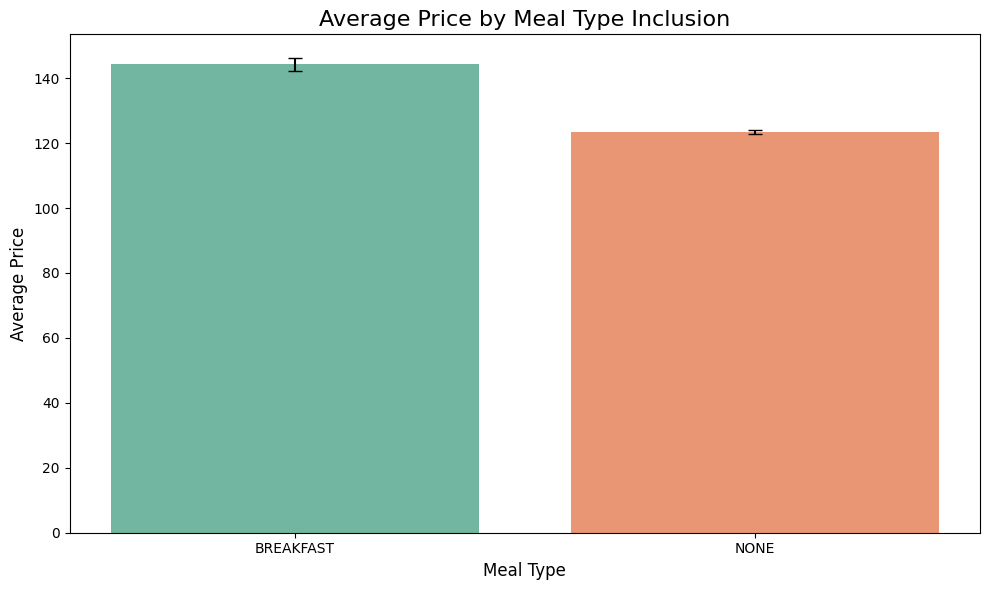

Levene's test indicates unequal variances (p-value = 0.0000), so Kruskal-Wallis can be used.
Meal inclusion significantly affects room prices (p-value = 0.0000)


In [ ]:
# Assuming 'merged_data' is the dataset
# Filter out rows where 'meal_type_included' or 'average_price' is missing
meal_data = merged_data[['meal_type_included', 'average_price']].dropna()

# Group data by 'meal_type_included' and calculate the mean, standard deviation, and count
meal_stats = meal_data.groupby('meal_type_included')['average_price'].agg(['mean', 'std', 'count'])

# Calculate standard error
meal_stats['se'] = meal_stats['std'] / meal_stats['count'] ** 0.5

# Now, instead of passing yerr directly, we'll add the error bars manually using ax.errorbar
plt.figure(figsize=(10, 6))

# Create the bar plot for average prices
ax = sns.barplot(x=meal_stats.index, y=meal_stats['mean'], palette='Set2')

# Add error bars manually
ax.errorbar(x=meal_stats.index, y=meal_stats['mean'], yerr=meal_stats['se'], fmt='none', c='black', capsize=5)

# Add labels and title
plt.title('Average Price by Meal Type Inclusion', fontsize=16)
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# Perform Kruskal-Wallis test to compare prices across meal types
meal_types = meal_data['meal_type_included'].unique()

# Prepare price data for each meal type
prices_with_meal = [meal_data[meal_data['meal_type_included'] == meal_type]['average_price'] for meal_type in meal_types]

from scipy.stats import levene

# Perform Levene's test for homogeneity of variances
stat, p_value = levene(*prices_with_meal)

# Output the results of the test
if p_value < 0.05:
    print(f"Levene's test indicates unequal variances (p-value = {p_value:.4f}), so Kruskal-Wallis can be used.")
else:
    print(f"Levene's test indicates equal variances (p-value = {p_value:.4f}), so Kruskal-Wallis can be used.")


# Perform Kruskal-Wallis test
stat, p_value = kruskal(*prices_with_meal)

# Output the results
if p_value < 0.05:
    print(f"Meal inclusion significantly affects room prices (p-value = {p_value:.4f})")
else:
    print(f"Meal inclusion does not significantly affect room prices (p-value = {p_value:.4f})")


> 💡 The bar chart displays the average room price for hotels with different meal inclusion types: "BREAKFAST" and "NONE." The error bars on each bar represent the standard error of the mean, indicating the variability of the average prices. The chart shows that rooms including breakfast have a noticeably higher average price compared to rooms without meals. Statistical testing was performed to validate this difference: Levene's test indicates unequal variances between the groups (p-value = 0.0000), and the Kruskal-Wallis test confirms that the difference in average prices between the meal inclusion types is statistically significant (p-value = 0.0000). This suggests that meal inclusion, particularly breakfast, significantly impacts room pricing.








***

## 5.7 Meal inclusion across star ratings and review categories


> ℹ This script analyzes the relationship between meal type inclusion, star ratings, and review categories of hotels by visualizing both counts and proportions. It first bins review scores into descriptive categories (e.g., "Very Low," "Low") and ensures that relevant columns (meal type, star rating, and review category) have no missing values. Counts of hotels grouped by meal type are visualized with bar plots for star ratings and review categories. Additionally, proportions of meal inclusion within each star rating and review category are calculated and displayed as stacked bar plots, showing the relative percentage of meal inclusion types (e.g., "Breakfast" vs. "None"). The visualizations include four subplots: counts and proportions for star ratings and review categories, providing insights into how meal inclusion varies across these categories. This approach highlights patterns in meal offerings by hotel quality and customer reviews.








/var/folders/r1/7q7bk_397yxc5xp5rbsj60wm0000gn/T/ipykernel_79265/3221041339.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_meal_counts = data.groupby([category_col, 'meal_type_included']).size().unstack(fill_value=0)
/var/folders/r1/7q7bk_397yxc5xp5rbsj60wm0000gn/T/ipykernel_79265/3221041339.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_meal_counts = data.groupby([category_col, 'meal_type_included']).size().unstack(fill_value=0)


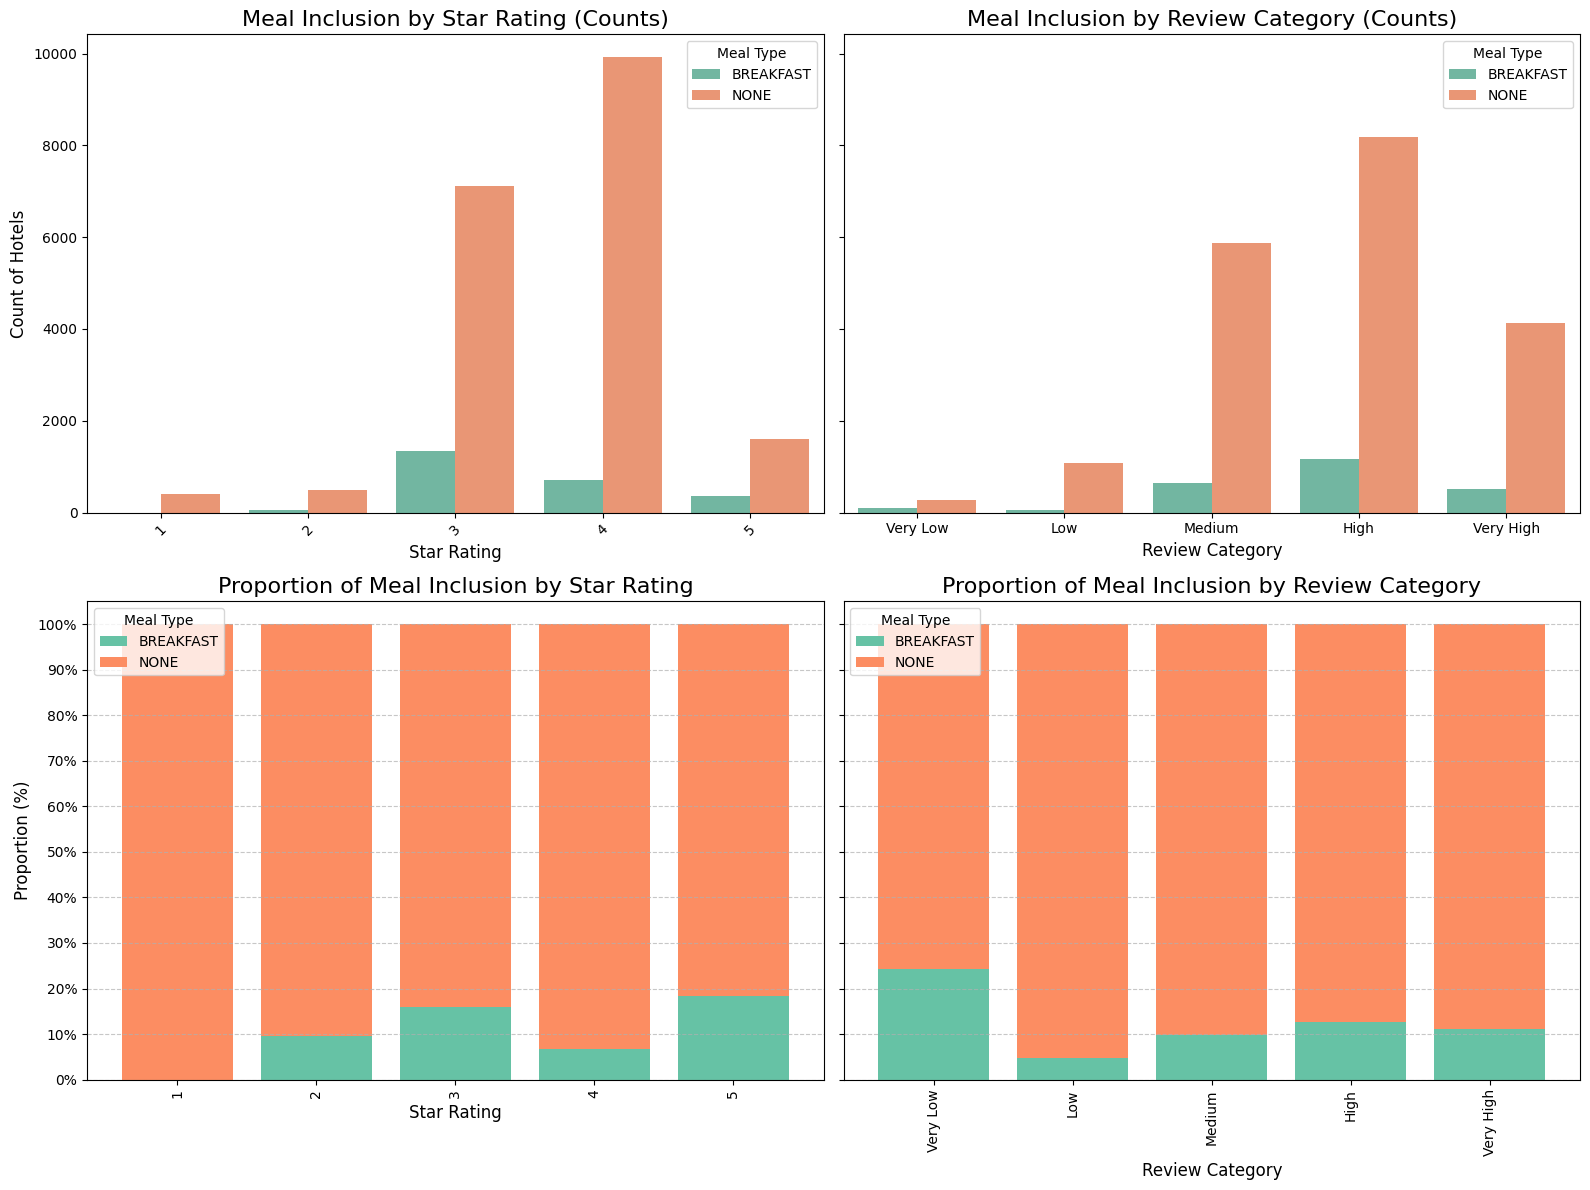

In [ ]:
# Define the number of bins for review scores
num_bins = 5

# Define equal-width bins for review scores
review_min, review_max = merged_data['review_score'].min(), merged_data['review_score'].max()
review_bins = np.linspace(review_min, review_max, num_bins + 1)
review_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Bin the review scores and create descriptive categories
merged_data['review_category'] = pd.cut(
    merged_data['review_score'],
    bins=review_bins,
    labels=review_labels,
    include_lowest=True
)

# Use the raw star rating data
merged_data['star_category'] = merged_data['stars'].astype(int)

# Filter out rows where 'meal_type_included', 'star_category', or 'review_category' is missing
meal_star_review_data = merged_data[['meal_type_included', 'star_category', 'review_category']].dropna()

# Function to calculate proportions for stacked bar plots
def calculate_proportions(data, category_col):
    # Group by the category and meal type, then count occurrences
    category_meal_counts = data.groupby([category_col, 'meal_type_included']).size().unstack(fill_value=0)

    # Normalize to calculate proportions
    category_meal_proportions = category_meal_counts.div(category_meal_counts.sum(axis=1), axis=0)

    return category_meal_proportions

# Calculate proportions for star categories
star_proportions = calculate_proportions(meal_star_review_data, 'star_category')

# Calculate proportions for review categories
review_proportions = calculate_proportions(meal_star_review_data, 'review_category')

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey='row')

# Count plot for star categories
sns.countplot(
    data=meal_star_review_data,
    x='star_category',
    hue='meal_type_included',
    palette='Set2',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Meal Inclusion by Star Rating (Counts)', fontsize=16)
axes[0, 0].set_xlabel('Star Rating', fontsize=12)
axes[0, 0].set_ylabel('Count of Hotels', fontsize=12)
axes[0, 0].legend(title='Meal Type', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)

# Count plot for review categories
sns.countplot(
    data=meal_star_review_data,
    x='review_category',
    hue='meal_type_included',
    palette='Set2',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Meal Inclusion by Review Category (Counts)', fontsize=16)
axes[0, 1].set_xlabel('Review Category', fontsize=12)
axes[0, 1].set_ylabel('')  # Share the y-axis label with the left plot
axes[0, 1].legend(title='Meal Type', fontsize=10)

# Stacked percentage bar plot for star categories
star_proportions.plot(
    kind='bar',
    stacked=True,
    ax=axes[1, 0],
    color=sns.color_palette('Set2', n_colors=2),
    width=0.8
)
axes[1, 0].set_title('Proportion of Meal Inclusion by Star Rating', fontsize=16)
axes[1, 0].set_xlabel('Star Rating', fontsize=12)
axes[1, 0].set_ylabel('Proportion (%)', fontsize=12)
axes[1, 0].set_yticks(np.arange(0, 1.1, 0.1))
axes[1, 0].set_yticklabels([f"{int(x * 100)}%" for x in np.arange(0, 1.1, 0.1)])
axes[1, 0].legend(title='Meal Type', fontsize=10, loc='upper left')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Stacked percentage bar plot for review categories
review_proportions.plot(
    kind='bar',
    stacked=True,
    ax=axes[1, 1],
    color=sns.color_palette('Set2', n_colors=2),
    width=0.8
)
axes[1, 1].set_title('Proportion of Meal Inclusion by Review Category', fontsize=16)
axes[1, 1].set_xlabel('Review Category', fontsize=12)
axes[1, 1].set_ylabel('')  # Share the y-axis label with the left plot
axes[1, 1].set_yticks(np.arange(0, 1.1, 0.1))
axes[1, 1].set_yticklabels([f"{int(x * 100)}%" for x in np.arange(0, 1.1, 0.1)])
axes[1, 1].legend(title='Meal Type', fontsize=10, loc='upper left')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


> 💡 The plots analyze the distribution of meal inclusion types ("Breakfast" and "None") across hotel star ratings and review categories. The top-left plot shows the counts of hotels offering different meal types for each star rating, indicating that higher-rated hotels (4 and 5 stars) dominate the dataset, with most offering no meals included. The top-right plot displays similar counts for review categories, revealing that hotels with "High" and "Very High" reviews also tend to lack meal inclusion. The bottom-left and bottom-right plots normalize these distributions, showing the proportion of meal inclusion within each star rating and review category, respectively. One start rating hotels completely lack breakfast. These visualizations emphasize that meal inclusion is relatively rare, regardless of a hotel's quality or review score.








***

## 5.8 Hotel price categories and meal inclusion


> ℹ This script analyzes the relationship between meal inclusion ("Breakfast" or "None") and price categories ("ref" for refundable and "non_ref" for non-refundable prices) in the dataset. It reshapes the data using the melt function to consolidate the price_value_ref and price_value_non_ref columns into a single column called price_value, with an accompanying price_category column indicating whether the price is refundable or non-refundable. Rows with missing values in the relevant columns are removed to ensure clean data. The code then creates a count plot using sns.countplot, displaying the number of hotels within each price category, split by meal inclusion type, using distinct colors for visualization. The chart is customized with a title, axis labels, and a legend to improve readability, helping to understand how meal inclusion varies across price categories.




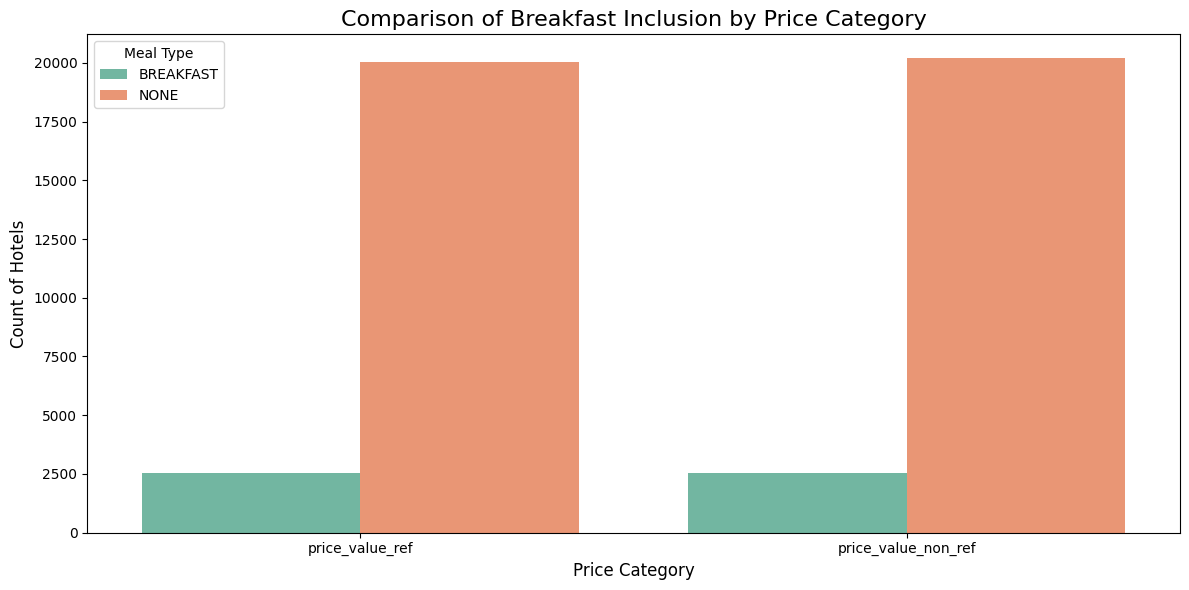

In [ ]:

# Filter the data for analysis
# Create a column indicating whether the price category is 'ref' or 'non_ref'
price_data = merged_data_with_clusters.melt(
    id_vars=['meal_type_included'],
    value_vars=['price_value_ref', 'price_value_non_ref'],
    var_name='price_category',
    value_name='price_value'
)

# Drop rows with missing values in the relevant columns
price_data = price_data.dropna(subset=['meal_type_included', 'price_value'])

# Step 2: Plot the data
plt.figure(figsize=(12, 6))
sns.countplot(
    data=price_data,
    x='price_category',
    hue='meal_type_included',
    palette='Set2'
)

# Step 3: Customize the plot
plt.title('Comparison of Breakfast Inclusion by Price Category', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Count of Hotels', fontsize=12)
plt.legend(title='Meal Type', fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()


> 💡 The bar chart visualizes the distribution of hotels across two price categories—price_value_ref (refundable) and price_value_non_ref (non-refundable)—and their correlation with meal inclusion (BREAKFAST vs. NONE). The majority of hotels fall under the "NONE" meal inclusion category for both refundable and non-refundable prices, as indicated by the dominant orange bars. A smaller proportion of hotels include breakfast, but the frequency appears to be independent of whether the price is refundable or not.












***

## 5.9 Lead time variations across hotel star ratings and cities

> ℹ This script analyzes the relationship between lead time (the number of days between booking and check-in) and hotel star ratings, focusing only on hotels that are fully booked. It first visualizes the lead time distribution across star ratings using a boxplot. Then, the normality of the lead time data is assessed using the Shapiro-Wilk test, revealing whether the data follows a normal distribution. A Kruskal-Wallis test is performed to determine if there are significant differences in lead time across star ratings, a non-parametric method suitable for non-normal data. Additionally, pairwise comparisons between star ratings are conducted using the Mann-Whitney U test, with results adjusted using the Bonferroni correction to account for multiple comparisons. The adjusted p-values highlight significant differences in lead times between specific star rating pairs, helping to identify patterns or distinctions in booking behavior across different hotel categories.


















/var/folders/r1/7q7bk_397yxc5xp5rbsj60wm0000gn/T/ipykernel_79265/812063075.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=booked_data, x='stars', y='lead_time', palette='Set3')


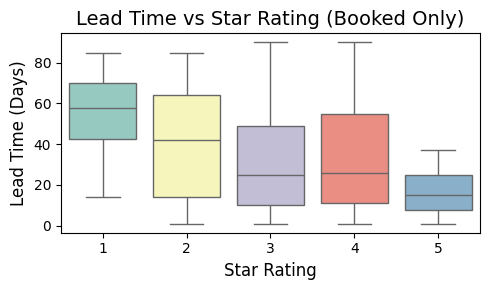

In [ ]:
# Ensure the necessary columns exist in the dataset
if all(col in merged_data.columns for col in ['lead_time', 'stars', 'city', 'is_sold_out']):
    # Filter data to include only booked hotels
    booked_data = merged_data[merged_data['is_sold_out'] == True].copy()

    # Create a single subplot for Lead Time vs Star Rating
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=booked_data, x='stars', y='lead_time', palette='Set3')
    plt.title('Lead Time vs Star Rating (Booked Only)', fontsize=14)
    plt.xlabel('Star Rating', fontsize=12)
    plt.ylabel('Lead Time (Days)', fontsize=12)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

else:
    print("The dataset is missing one or more required columns.")


In [ ]:
stat, p_value = shapiro(booked_data['lead_time'])
print(f"Shapiro-Wilk test p-value: {p_value}")
if p_value < 0.05:
    print("Data is not normally distributed.")
else:
    print("Data is normally distributed.")

Shapiro-Wilk test p-value: 1.8508602793569104e-37
Data is not normally distributed.


In [ ]:
for star in booked_data['stars'].unique():
    stat, p = shapiro(booked_data[booked_data['stars'] == star]['lead_time'])
    print(f"Stars: {star}, Shapiro-Wilk p-value: {p}")
    if p < 0.05:
        print(f"Lead time for {star}-star hotels is not normally distributed.")
    else:
        print(f"Lead time for {star}-star hotels is normally distributed.")

Stars: 2, Shapiro-Wilk p-value: 9.81599351071625e-05
Lead time for 2-star hotels is not normally distributed.
Stars: 4, Shapiro-Wilk p-value: 3.919235811175487e-23
Lead time for 4-star hotels is not normally distributed.
Stars: 3, Shapiro-Wilk p-value: 1.6870712803984388e-29
Lead time for 3-star hotels is not normally distributed.
Stars: 5, Shapiro-Wilk p-value: 0.0003972815665658703
Lead time for 5-star hotels is not normally distributed.
Stars: 1, Shapiro-Wilk p-value: 0.1319607903583549
Lead time for 1-star hotels is normally distributed.


In [ ]:

groups = [booked_data[booked_data['stars'] == star]['lead_time'] for star in booked_data['stars'].unique()]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis Test p-value: {p}")
if p < 0.05:
    print("Significant difference in lead time across star ratings.")
else:
    print("No significant difference in lead time across star ratings.")


Kruskal-Wallis Test p-value: 5.4689399284442e-15
Significant difference in lead time across star ratings.


In [ ]:

# Get all unique star ratings
star_ratings = booked_data['stars'].unique()

# Prepare a list to store pairwise results
results = []

# Perform pairwise Mann-Whitney U tests
for (star1, star2) in itertools.combinations(star_ratings, 2):
    group1 = booked_data[booked_data['stars'] == star1]['lead_time']
    group2 = booked_data[booked_data['stars'] == star2]['lead_time']

    # Perform Mann-Whitney U test
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

    # Store results
    results.append({'Group1': star1, 'Group2': star2, 'p-value': p})

# Convert results to a DataFrame
posthoc_results = pd.DataFrame(results)

# Adjust p-values using the Bonferroni correction
posthoc_results['p-value_adj'] = posthoc_results['p-value'] * len(posthoc_results)

# Print all results
print("Pairwise Mann-Whitney U Test Results:")
print(posthoc_results)

# Highlight significant results (adjusted p-value < 0.05)
significant_results = posthoc_results[posthoc_results['p-value_adj'] < 0.05]

# Print significant results
print("\nSignificant Pairwise Comparisons:")
print(significant_results)

Pairwise Mann-Whitney U Test Results:
   Group1  Group2       p-value   p-value_adj
0       2       4  4.623778e-02  4.623778e-01
1       2       3  7.707204e-03  7.707204e-02
2       2       5  6.002957e-08  6.002957e-07
3       2       1  4.801681e-03  4.801681e-02
4       4       3  1.317407e-01  1.317407e+00
5       4       5  2.487460e-08  2.487460e-07
6       4       1  1.423008e-07  1.423008e-06
7       3       5  1.549207e-07  1.549207e-06
8       3       1  3.568590e-09  3.568590e-08
9       5       1  1.809178e-16  1.809178e-15

Significant Pairwise Comparisons:
   Group1  Group2       p-value   p-value_adj
2       2       5  6.002957e-08  6.002957e-07
3       2       1  4.801681e-03  4.801681e-02
5       4       5  2.487460e-08  2.487460e-07
6       4       1  1.423008e-07  1.423008e-06
7       3       5  1.549207e-07  1.549207e-06
8       3       1  3.568590e-09  3.568590e-08
9       5       1  1.809178e-16  1.809178e-15


/var/folders/r1/7q7bk_397yxc5xp5rbsj60wm0000gn/T/ipykernel_79265/2619551503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=booked_data, x='stars', y='lead_time', palette='Set3')


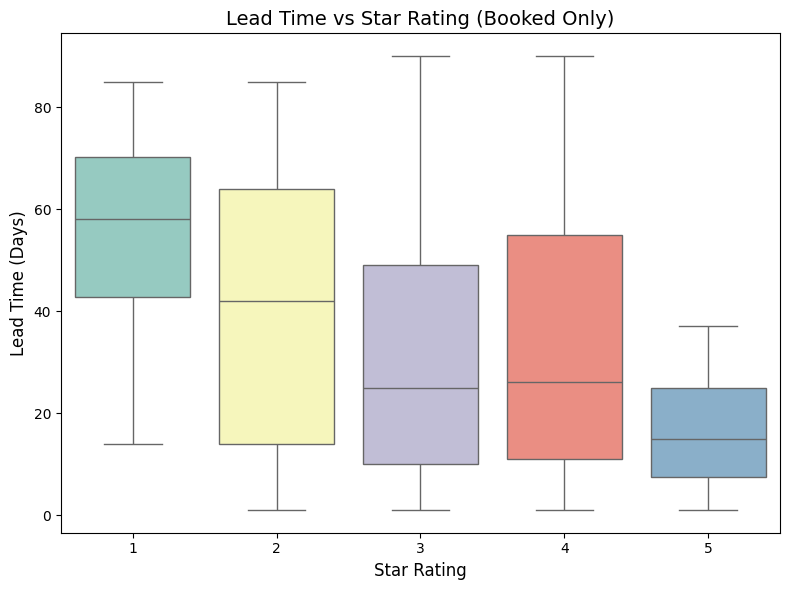

In [ ]:
 # single subplot for Lead Time vs Star Rating
plt.figure(figsize=(8, 6))
sns.boxplot(data=booked_data, x='stars', y='lead_time', palette='Set3')
plt.title('Lead Time vs Star Rating (Booked Only)', fontsize=14)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Lead Time (Days)', fontsize=12)

    # Adjust layout and display the plot
plt.tight_layout()
plt.show()

> 💡The analysis investigates the relationship between lead time and hotel star ratings using statistical tests. The Shapiro-Wilk test results show that the lead time data is not normally distributed for most star ratings, except for 1-star hotels (p-value > 0.05). A Kruskal-Wallis test, suitable for non-normal data, indicates a statistically significant difference in lead times across star ratings (p-value < 0.05). Pairwise comparisons using the Mann-Whitney U test, with Bonferroni-adjusted p-values, reveal significant differences between specific star rating pairs. For instance, lead times for 2-star vs. 5-star, 4-star vs. 5-star, and 3-star vs. 5-star hotels differ significantly, with higher star ratings generally associated with shorter lead times. This is visually supported by the boxplot, which shows that 1-star and 2-star hotels have the longest lead times, while 5-star hotels have the shortest. These results highlight distinct booking behaviors across hotel categories, where budget hotels are booked further in advance compared to luxury hotels.


***

## 5.10 Average hotel prices and star ratings

> ℹ This scripts generates line charts showing average hotel prices over time, categorized by star ratings and sold-out status. It ensures required columns exist, converts arrival_date to datetime, and groups data by month, star rating, and sold-out status to calculate average prices. Each star rating gets its own subplot

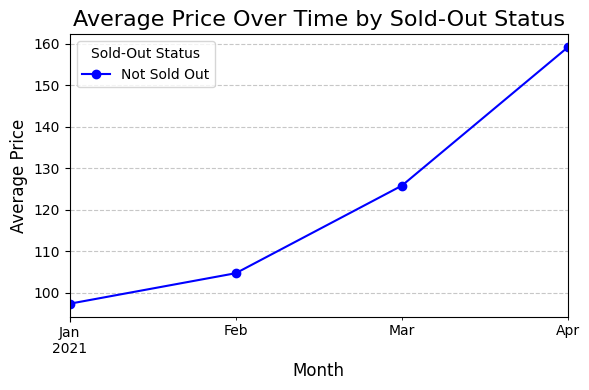

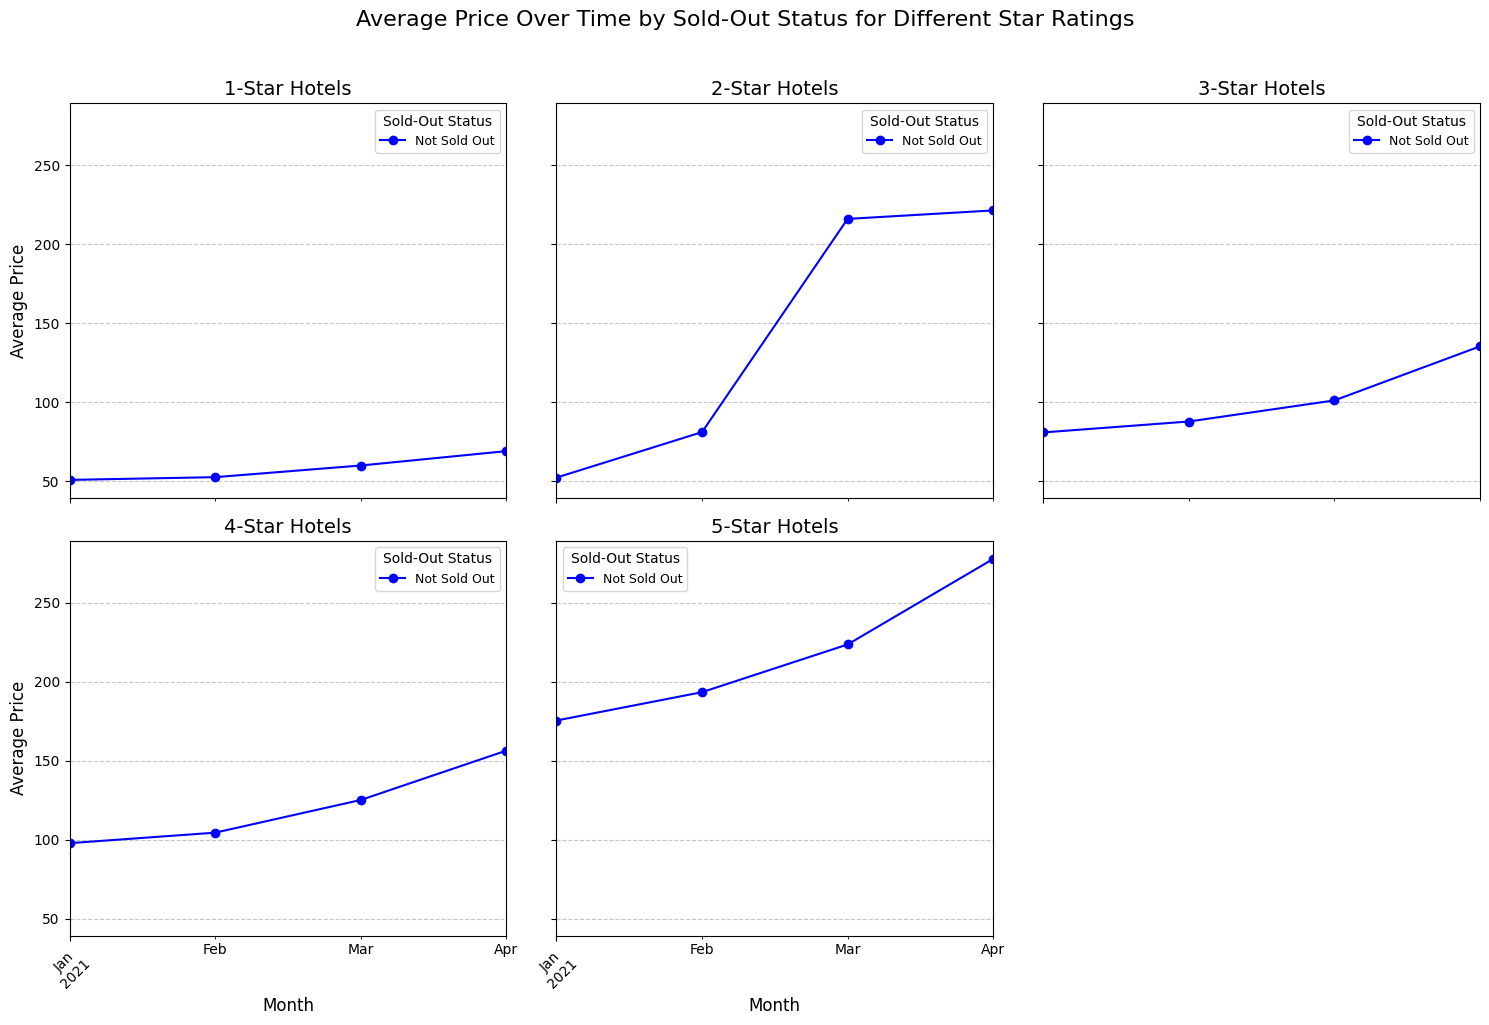

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Ensure the necessary columns exist in the dataset
if all(col in merged_data.columns for col in ['is_sold_out', 'average_price', 'arrival_date']):
    # Convert arrival_date to datetime if not already
    merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'])

    # Group data by month for aggregation
    merged_data['month'] = merged_data['arrival_date'].dt.to_period('M')

    # Filter out rows with missing average price
    valid_data = merged_data.dropna(subset=['average_price'])

    # Aggregate data to calculate the average price for sold-out and not-sold-out hotels
    avg_price_analysis = valid_data.groupby(['month', 'is_sold_out'])['average_price'].mean().reset_index()

    # Pivot data for easier plotting
    avg_price_pivot = avg_price_analysis.pivot(index='month', columns='is_sold_out', values='average_price')
    avg_price_pivot.rename(columns={True: 'Sold Out', False: 'Not Sold Out'}, inplace=True)

    # Plot the overall trends over time
    plt.figure(figsize=(6, 4))
    avg_price_pivot.plot(kind='line', marker='o', ax=plt.gca(), color=['blue', 'red'])
    plt.title('Average Price Over Time by Sold-Out Status', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Price', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Sold-Out Status', labels=['Not Sold Out', 'Sold Out'], fontsize=10)
    plt.tight_layout()
    plt.show()

    # Ensure the necessary columns exist for star ratings
    if 'stars' in merged_data.columns:
        # Aggregate data to calculate the average price for sold-out hotels by month and star rating
        avg_price_analysis = valid_data.groupby(['month', 'stars', 'is_sold_out'])['average_price'].mean().reset_index()

        # Get unique star ratings
        star_ratings = sorted(avg_price_analysis['stars'].unique())

        # Calculate grid size for subplots
        num_plots = len(star_ratings)
        cols = 3  # Number of columns in the grid
        rows = math.ceil(num_plots / cols)  # Number of rows needed

        # Create the subplots
        fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharex=True, sharey=True)
        axes = axes.flatten()  # Flatten the axes array for easier iteration

        for i, star in enumerate(star_ratings):
            star_data = avg_price_analysis[avg_price_analysis['stars'] == star]
            pivot_data = star_data.pivot(index='month', columns='is_sold_out', values='average_price')
            pivot_data.rename(columns={True: 'Sold Out', False: 'Not Sold Out'}, inplace=True)

            ax = axes[i]
            pivot_data.plot(kind='line', marker='o', ax=ax, color=['blue', 'red'])
            ax.set_title(f'{star}-Star Hotels', fontsize=14)
            ax.set_xlabel('Month', fontsize=12)
            ax.set_ylabel('Average Price', fontsize=12)
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            ax.legend(title='Sold-Out Status', labels=['Not Sold Out', 'Sold Out'], fontsize=9)
            ax.tick_params(axis='x', rotation=45)

        # Hide any unused subplot axes
        for j in range(len(star_ratings), len(axes)):
            axes[j].set_visible(False)

        # Set a global title and adjust layout
        fig.suptitle('Average Price Over Time by Sold-Out Status for Different Star Ratings', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()

else:
    print("The dataset is missing one or more required columns.")


> 💡 This line chart illustrates the trend in average hotel prices over time. No data on price and rows with sold out hotels are available so these were not included. The x-axis represents the months from January to April 2021, while the y-axis displays the average price of hotel rooms. The line shows a consistent increase in the average price of hotels over the observed period, suggesting that room prices rose steadily from January to April. The upward trend highlights potential seasonal price adjustments or changes in demand over these months. The subplots consists of line charts showing the trend of average hotel prices over time (January to April 2021) for different star ratings (e.g., 4-star, 5-star hotels). The data highlights how pricing increases across all star ratings, with a flatter increase for one-star hotels, likely reflecting their strategy to keep prices low. The underlying reason for the overall price increase over the months cannot be directly explained from the dataset but is likely linked to external factors such as seasonal demand, events, or holidays driving higher rates.















***

## 5.11 Average hotel prices across cities and time


> ℹ This script analyzes the trend in average hotel prices over time for different cities and calculates the price changes from January to April 2021. The arrival_date column is converted to datetime format, and a new column (month) is created to group data by month. Rows with missing average_price values are removed, and the average price for each city is calculated for each month. The data is then pivoted to create a time-series structure, where each city corresponds to a column. The code calculates the total and percentage increase in average prices for each city between January and April 2021 and prints these results. Finally, a line plot visualizes the trend of average prices for each city over time, with separate lines representing different cities. The graph uses distinct colors for cities and includes labels, grid lines, and a legend for clarity.

Total Increase in Average Price (January to April):
city
Amsterdam    88.438023
Brussels     18.321449
dtype: float64

Percentage Increase in Average Price (January to April):
city
Amsterdam    92.837229
Brussels     17.974505
dtype: float64


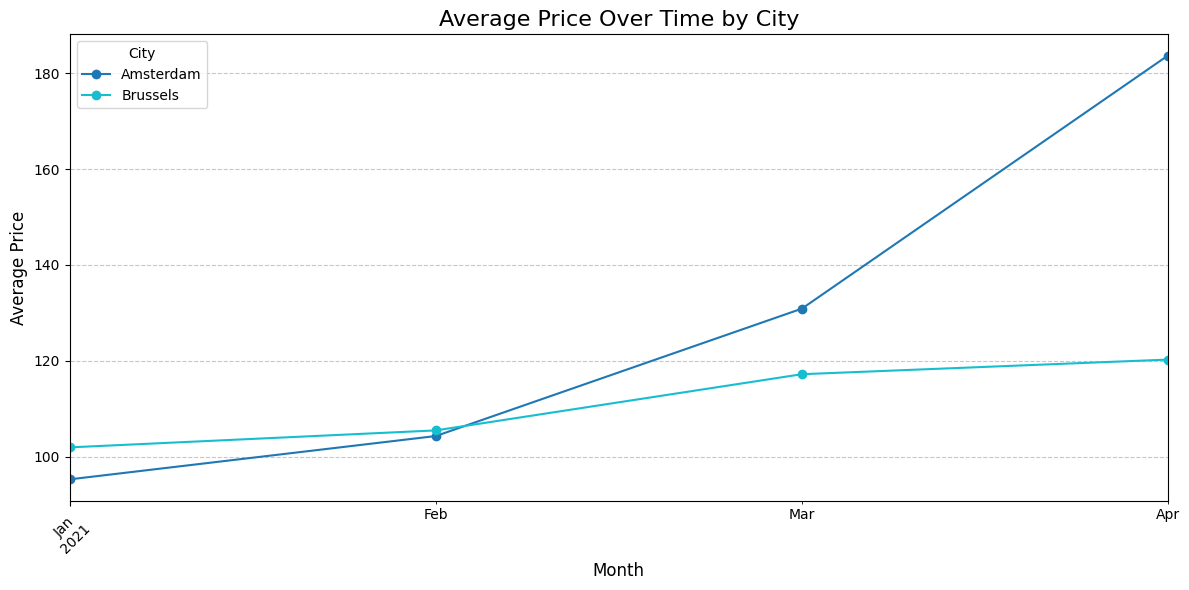

In [ ]:

# Ensure the necessary columns exist in the dataset
if all(col in merged_data.columns for col in ['city', 'average_price', 'arrival_date']):
    # Convert arrival_date to datetime if not already
    merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'])

    # Group data by month for aggregation
    merged_data['month'] = merged_data['arrival_date'].dt.to_period('M')

    # Filter out rows with missing average price
    valid_data = merged_data.dropna(subset=['average_price'])

    # Aggregate data to calculate the average price for each city over time
    city_price_analysis = valid_data.groupby(['month', 'city'])['average_price'].mean().reset_index()

    # Pivot data for easier plotting
    city_price_pivot = city_price_analysis.pivot(index='month', columns='city', values='average_price')

    # Calculate the total increase and percentage increase in average price
    january_prices = city_price_pivot.loc['2021-01']
    april_prices = city_price_pivot.loc['2021-04']
    total_increase = april_prices - january_prices
    percentage_increase = (total_increase / january_prices) * 100

    # Print the results
    print("Total Increase in Average Price (January to April):")
    print(total_increase)
    print("\nPercentage Increase in Average Price (January to April):")
    print(percentage_increase)

    # Plot the trends over time
    plt.figure(figsize=(12, 6))
    city_price_pivot.plot(kind='line', marker='o', ax=plt.gca(), colormap='tab10')
    plt.title('Average Price Over Time by City', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Price', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='City', fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("The dataset is missing one or more required columns.")


> 💡 The chart shows the trend of average hotel prices in Amsterdam and Brussels over the period from January to April 2021, alongside the calculated increases in prices. Amsterdam experiences a significant rise in prices, with a total increase of 88.44 units, representing a 92.83% growth from January to April. In contrast, Brussels shows a smaller rise, with a total increase of 18.32 units, corresponding to a 17.97% growth. The line plot highlights that while both cities see an upward trend in average prices, the increase is much steeper in Amsterdam, suggesting stronger market dynamics or specific events driving the price surge in that city.








***

## 5.12 Room category distribution across hotel star ratings and cities


> ℹ The script generates a stacked bar chart to visualize the percentage distribution of room categories across different hotel star ratings. It first checks if the dataset contains the required columns (stars and room_category) and filters out rows with missing values in these columns. Using a cross-tabulation, it calculates the count of each room category for each star rating and normalizes these counts to percentages, providing a proportional view. The data is then plotted as a stacked bar chart, where each bar represents a star rating, and the stacked segments illustrate the percentages of different room categories within that rating.

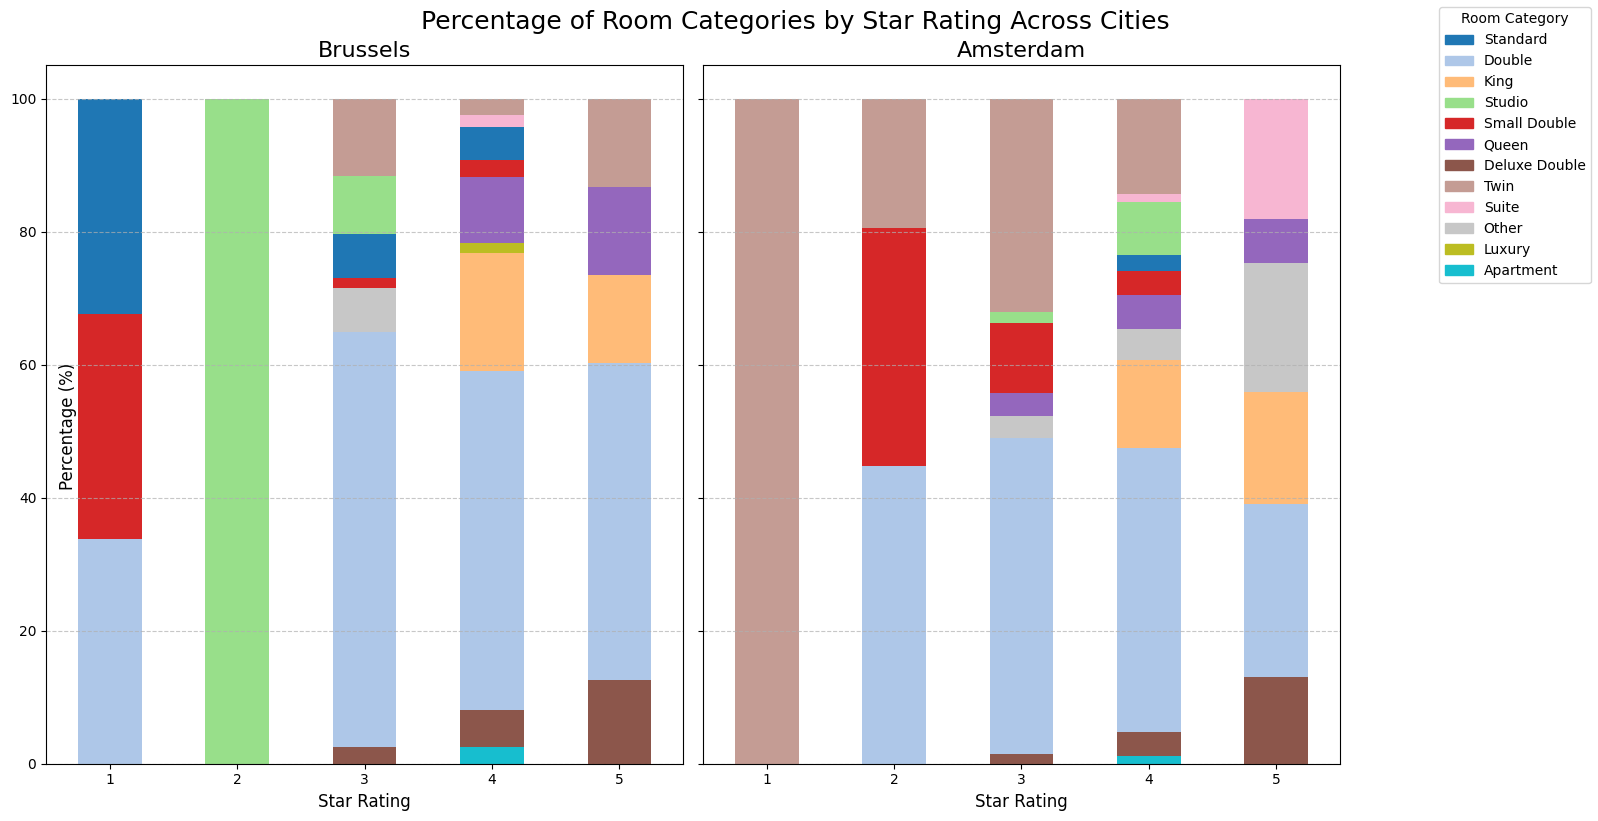

In [ ]:
# Ensure the necessary columns exist in the dataset
if all(col in merged_data.columns for col in ['stars', 'room_category', 'city']):
    # Filter out rows with missing room categories, star ratings, or city information
    valid_data = merged_data.dropna(subset=['stars', 'room_category', 'city'])

    # Define consistent colors for room categories
    room_categories = valid_data['room_category'].unique()
    category_colors = {category: plt.cm.tab20(i / len(room_categories)) for i, category in enumerate(room_categories)}

    # Unique cities in the dataset
    cities = valid_data['city'].unique()

    # Initialize subplots
    fig, axes = plt.subplots(1, len(cities), figsize=(16, 8), sharey=True)

    # Loop through each city to create subplots
    for ax, city in zip(axes, cities):
        # Filter data for the current city
        city_data = valid_data[valid_data['city'] == city]

        # Create a cross-tabulation of room categories by star rating
        room_category_counts = pd.crosstab(city_data['stars'], city_data['room_category'])

        # Normalize counts to calculate percentages for each star rating
        room_category_percentages = room_category_counts.div(room_category_counts.sum(axis=1), axis=0) * 100

        # Plot the data as a stacked bar chart with consistent colors
        room_category_percentages.plot(
            kind='bar', stacked=True, ax=ax,
            color=[category_colors[col] for col in room_category_counts.columns], legend=False
        )

        # Add title and labels
        ax.set_title(f'{city}', fontsize=16)
        ax.set_xlabel('Star Rating', fontsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add shared y-axis label
    fig.text(0.04, 0.5, 'Percentage (%)', va='center', rotation='vertical', fontsize=12)

    # Add legend to the last subplot
    handles = [plt.Rectangle((0, 0), 1, 1, color=category_colors[col]) for col in room_categories]
    labels = room_categories
    fig.legend(handles, labels, title='Room Category', loc='upper right', fontsize=10)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.suptitle('Percentage of Room Categories by Star Rating Across Cities', fontsize=18, y=1.02)
    plt.show()

else:
    print("The dataset is missing one or more required columns.")


> 💡 The plots highlight notable differences in room category distributions across star ratings in Brussels and Amsterdam. In Brussels, 2-star hotels exclusively feature "Studio" rooms, while in Amsterdam, 1-star hotels consist solely of "Twin" rooms, indicating a lack of diversity in lower-star accommodations in both cities. As star ratings increase, both cities exhibit a greater variety of room categories, with "Double" rooms being well-represented across the majority of star categories, emphasizing their role as a versatile option catering to a wide range of travelers.





















## 5.13 Average room prices by room category
ge Room Prices by Room Category

> ℹ This script analyzes and visualizes the average price of rooms by their categories in a dataset. It begins by checking if the required columns ('average_price' and 'room_category') exist in the dataset. If present, it removes rows with missing values in these columns to ensure data integrity. The cleaned data is then grouped by room category, and the mean average price is calculated for each category. The results are sorted in descending order of average price for better visualization. Finally, a bar plot is created using Seaborn (sns.barplot) to display the average prices by room category.

/var/folders/r1/7q7bk_397yxc5xp5rbsj60wm0000gn/T/ipykernel_79265/3175939809.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


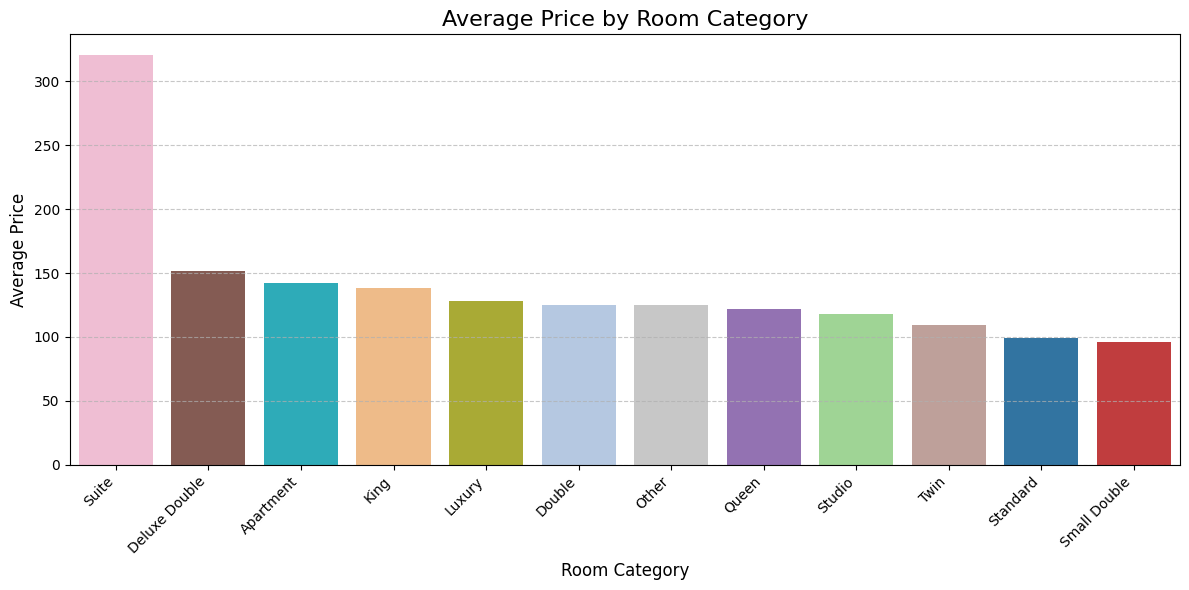

In [ ]:
# Ensure the necessary columns exist in the dataset
if all(col in merged_data.columns for col in ['average_price', 'room_category']):
    # Filter out rows with missing average price or room categories
    valid_data = merged_data.dropna(subset=['average_price', 'room_category'])

    # Group data by room category to calculate the average price
    avg_price_by_category = valid_data.groupby('room_category')['average_price'].mean().reset_index()

    # Sort by average price for better visualization
    avg_price_by_category = avg_price_by_category.sort_values('average_price', ascending=False)

    # Define consistent colors for room categories (shared with the first script)
    room_categories = valid_data['room_category'].unique()
    category_colors = {category: plt.cm.tab20(i / len(room_categories)) for i, category in enumerate(room_categories)}

    # Plot the data
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=avg_price_by_category,
        x='room_category',
        y='average_price',
        palette=[category_colors[cat] for cat in avg_price_by_category['room_category']]
    )

    # Add titles and labels
    plt.title('Average Price by Room Category', fontsize=16)
    plt.xlabel('Room Category', fontsize=12)
    plt.ylabel('Average Price', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("The dataset is missing one or more required columns.")


> 💡 The bar plot visualizes the average price for various room categories, highlighting that "Suite" has the highest average price, significantly exceeding all other categories. Other categories, such as "Deluxe Double," "Apartment," "King," and "Luxury," follow with moderately high average prices, while categories like "Small Double," "Standard," and "Twin" have the lowest.







***

## 5.14 Room categories across hotel star ratings
 Distribution of Room Categories Across Hotel Star Ratings

> ℹ This code analyzes and visualizes the maximum and average person capacity across different room categories in a dataset. It first checks if the necessary columns (max_persons and room_category) exist, and then filters out rows with missing values in these columns. The data is grouped by room category to calculate the mean and maximum capacity of persons for each category. The resulting summary is reshaped into a long format for easier visualization, distinguishing between the average (mean) and maximum (max) values. A bar plot is created using Seaborn to display the maximum and average person capacities for each room category, with separate bars and a legend to differentiate the two metrics.







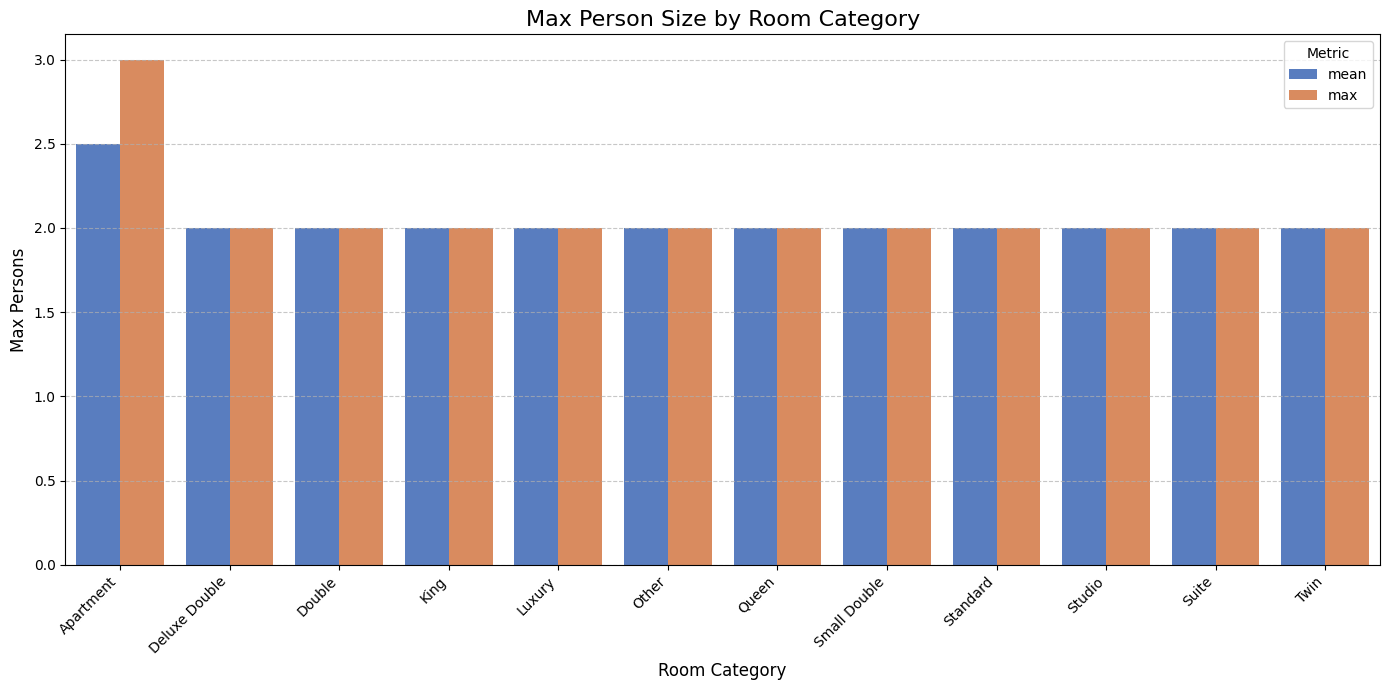

In [ ]:
# Ensure the necessary columns exist in the dataset
if all(col in merged_data.columns for col in ['max_persons', 'room_category']):
    # Filter out rows with missing max person size or room categories
    valid_data = merged_data.dropna(subset=['max_persons', 'room_category'])

    # Group data by room category to calculate the average and maximum max_persons
    person_size_by_category = valid_data.groupby('room_category')['max_persons'].agg(['mean', 'max']).reset_index()

    # Melt the DataFrame for easier plotting
    melted_data = person_size_by_category.melt(
        id_vars='room_category',
        value_vars=['mean', 'max'],
        var_name='Metric',
        value_name='Max Persons'
    )

    # Plot the data
    plt.figure(figsize=(14, 7))
    sns.barplot(
        data=melted_data,
        x='room_category',
        y='Max Persons',
        hue='Metric',
        palette='muted'
    )

    # Add titles and labels
    plt.title('Max Person Size by Room Category', fontsize=16)
    plt.xlabel('Room Category', fontsize=12)
    plt.ylabel('Max Persons', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Metric', loc='upper right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("The dataset is missing one or more required columns.")


> 💡 The bar chart visualizes the maximum and average person capacity for different room categories in a dataset. Each room category is represented on the x-axis, while the y-axis shows the number of persons. Two bars are shown for each category: one for the mean (average) maximum occupancy and the other for the absolute maximum occupancy. The chart highlights that for most room categories, the mean and maximum capacities are similar, around two persons, except for the "Apartment" category, which has a notably higher maximum occupancy of three persons. This suggests that apartments accommodate more people on average compared to other room types. The chart helps in understanding how room types differ in their capacity to house guests.








***

## 5.15 Meal inclusion types and room category


> ℹ This code visualizes the percentage distribution of meal inclusion types across various hotel room categories. It first checks if the dataset contains the necessary columns (room_category and meal_type_included) and removes rows with missing values to ensure clean data. Then, it groups the data by room category and meal inclusion type, counting occurrences for each combination. These counts are normalized to calculate percentages, providing insights into how meal inclusion varies by room category. Finally, it creates a stacked bar chart to display the percentages, with each bar representing a room category and the stacked segments showing the relative proportions of meal inclusion types.








/var/folders/r1/7q7bk_397yxc5xp5rbsj60wm0000gn/T/ipykernel_79265/1802066730.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meal_by_category = valid_data.groupby(['room_category', 'meal_type_included']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

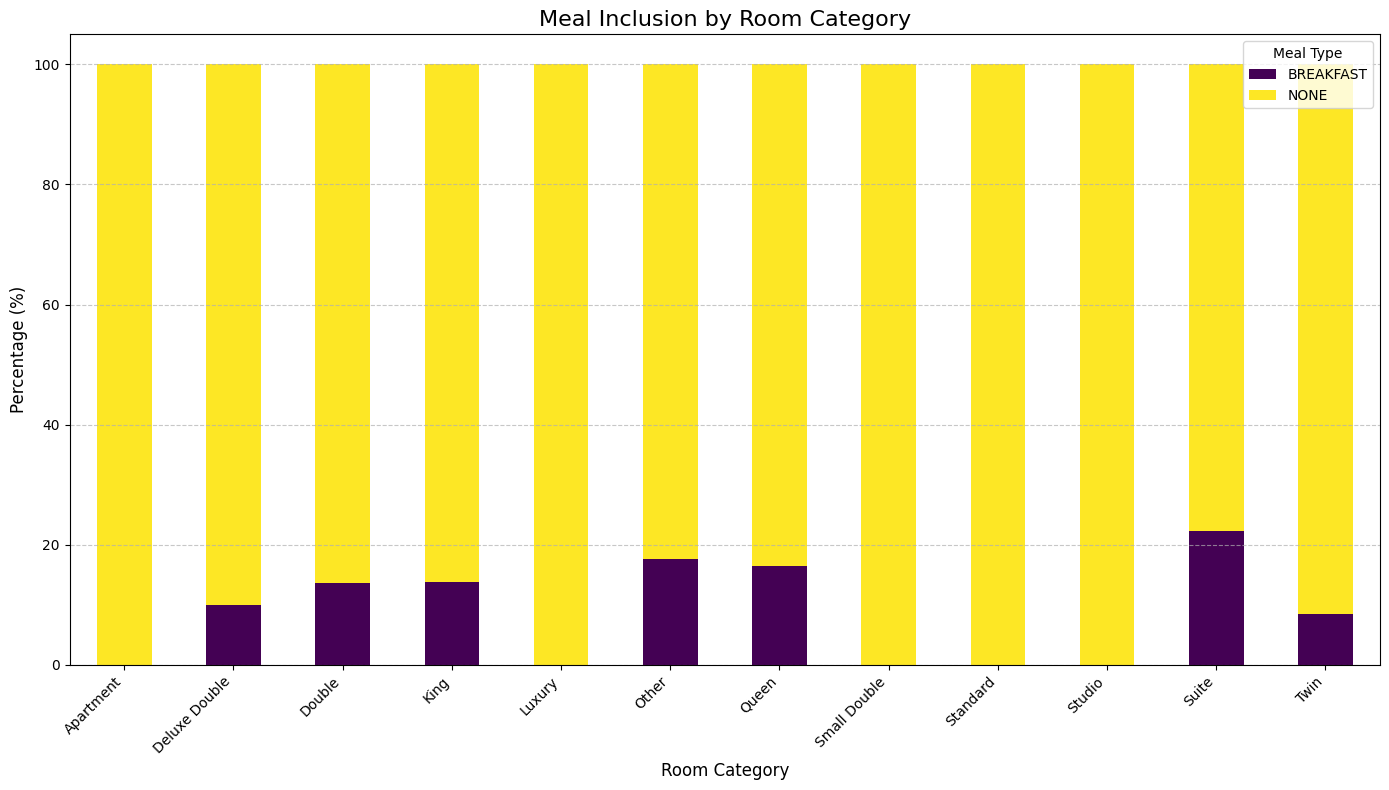

In [ ]:

# Ensure the necessary columns exist in the dataset
if all(col in merged_data.columns for col in ['room_category', 'meal_type_included']):
    # Filter out rows where 'room_category' or 'meal_type_included' is missing
    valid_data = merged_data.dropna(subset=['room_category', 'meal_type_included'])

    # Group by room category and meal inclusion type
    meal_by_category = valid_data.groupby(['room_category', 'meal_type_included']).size().unstack(fill_value=0)

    # Normalize to calculate percentages for each room category
    meal_by_category_percentage = meal_by_category.div(meal_by_category.sum(axis=1), axis=0) * 100

    # Plot the data
    plt.figure(figsize=(12, 6))
    meal_by_category_percentage.plot(
        kind='bar',
        stacked=True,
        colormap='viridis',
        figsize=(14, 8)
    )

    # Add titles and labels
    plt.title('Meal Inclusion by Room Category', fontsize=16)
    plt.xlabel('Room Category', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Meal Type', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("The dataset is missing one or more required columns.")


> 💡 The visualization shows the percentage distribution of meal inclusion types (breakfast or none) across different hotel room categories. Each bar represents a room category, and the stacked segments within each bar indicate the proportion of rooms offering breakfast (dark purple) or no meal included (yellow). The chart highlights that for most room categories, the majority of rooms do not include breakfast, as shown by the dominant yellow segments. However, certain categories like "Suite" and "Twin" show a relatively higher percentage of rooms offering breakfast compared to other categories.








***

## 6. CONCLUSION


> The following key findings provide insights from the hotel dataset analysis , which includes 25,380 booking records detailing lead times, arrival dates, room types, and pricing,as well as 282 hotel entries with information on hotel names, locations, star ratings,and room counts, provides valuable insights. The data was consolidated into a unified dataset containing 18 variables after being merged based on hotel ID. While is free of duplicates, there are missing values in key area ssuch as room details and pricing, especially for sold-out records. Missing hotel-specific information, including star ratings and room counts, was supplemented based on internet sources, while other gaps in the data were left to retain flexibility. Anomalies, such as invalid review scores, were removed for consistency. The analysis spans the total timeframe of the dataset, which is from January 23, 2021, to April 22, 2021, and was carried out using Python along with a range of libraries.

#### Key findings:

#### 1. Price overlaps complicate segmentation:
Clustering based on price and quality revealed three groups: lower-quality hotels, higher-quality hotels, and high-priced hotels across all rating levels, complicating clear segmentation since price overlaps with both low and high-quality categories.

#### 2. Amsterdam's hotel market is bigger:
Amsterdam's hotel market is significantly larger due to its four-times-larger city size. However, both cities show similar star rating distributions, with a notably smaller share of budget-friendly options, highlighting a shared commitment to quality.

#### 3. January booking surge and drop:
January sees a spike in sold-out rates, which decreases over the months, with overall hotels remaining largely unbooked, highlighting fluctuating demand and underutilized capacity.

#### 4. Unexpected demand shifts:
In Amsterdam, higher star ratings correlate with fewer sold-out hotels, while Brussels experiences surprising spikes in demand for low-reviewed hotels, potentially driven by hidden factors like location or flexible booking policies.

#### 5. Amsterdam vs Brussels - sold-out disparity:
Sold-out rates in Amsterdam remain quite steady over time, while Brussels experiences a sharp drop, emphasizing seasonal booking behaviors and geographic influences on demand.

#### 6. Meals drive hotel pricing:
Hotels that offer meals, particularly breakfast, tend to have higher average prices, reflecting how operational costs influence room rates across the industry.

#### 7. Meals rarely included:
Across all hotel ratings, meals are predominantly excluded, with 1-star hotels completely lacking meal inclusion, showcasing minimal meal offerings in lower-tier options.

#### 8. No impact from refundable pricing:
Surprisingly, meal inclusion remains unaffected by whether a hotel’s pricing is refundable or not, showing an unexpected disconnect between pricing flexibility and meal services.

#### 9. Budget early, luxury last-minute:
Budget hotels are booked well in advance, while luxury hotels experience last-minute bookings, highlighting the different booking behaviors of budget-conscious travelers versus high-end clientele.

#### 10. Rising room prices:
Room prices steadily rise over time, likely driven by seasonal factors, showing an overall upward trend, with 1-star hotels experiencing the smallest increase due to their strategy of maintaining affordable prices.

#### 11. Amsterdam’s price surge:
Amsterdam sees a massive price increase, with a rise of nearly 93%, contrasting with Brussels’ modest growth, underlining Amsterdam's strong demand dynamics and its ability to capitalize on peak periods.

#### 12. Room options by rating:
Lower-rated hotels offer limited options, with Amsterdam’s 1-star and Brussels’ 2-star hotels focusing mostly on basic twin and studio rooms, while higher-rated hotels offer a wider variety, though double rooms remain the most common.

#### 13. Luxury has a price tag:
Suites top the price list, followed by luxury rooms, while more economical options like twin or small double rooms reflect clear pricing tiers, showing how room categories drive cost differentiation.

#### 14. Space matters in room capacity:
Apartments stand out with the highest capacity, accommodating more guests than other room types, positioning them as ideal for families or larger groups.

#### 15. No clear breakfast trends in hotel rooms:
While most room categories exclude breakfast, Suite and Twin rooms are the most likely to include it, although no clear pattern emerges regarding which room types are most likely to offer meals.


> These insights offer a comprehensive view of the hotel market dynamics in Amsterdam and Brussels, highlighting key trends in pricing, occupancy, and customer preferences. However, while the dataset provides valuable trends, further research and more detailed data are needed to fully understand the complexities of the hotel industry.  It's important to interpret these conclusions with caution, as the dataset may not fully reflect the complete dynamics of the hotel markets in both cities. Tailored pricing strategies and a deeper understanding of geographical and seasonal factors will be essential for businesses to optimize their operations and stay competitive.